# Ejercicio 4: Introducción a la anonimización de datos (1,75 ptos)

Utilizando los conocimientos adquiridos tras leer el caso práctico de ["Introducción a la anonimización de datos"](https://datos.gob.es/sites/default/files/doc/file/informe-anonimizacion-es.pdf), trata de anonimizar el siguiente dataset aplicando la técnica de generalización conocida como "Anonimato-K" de manera que se asegure una anonimización hasta el nivel K=3 **sin eliminar ninguna columna**.

### Presentación y generación del dataset

El dataset elegido es la otra variante del ejemplo *Simple Table-Disk based simple table*, del [proyecto Amnesia](https://amnesia.openaire.eu/download.html). Los datos han sido ligeramente adaptados para conseguir unos mejores resultados.

Desde la página de Amnesia no nos proporcionan contexto del dataset, pero para este ejercicio vamos a **suponer que son datos sensibles de pacientes diagnosticados con diabetes de tipo II**, donde `age` es su edad actual y `date` la fecha en la que el diagnóstico se hizo efectivo.

In [ ]:
%%writefile dataset.csv
postcode,date,age
78226,26/11/1958,85
25559,24/8/1966,76
84503,21/11/1971,91
64430,11/10/1966,81
57114,12/9/1986,98
95196,29/5/2010,40
27507,19/10/1991,55
62373,7/9/2016,54
28785,3/1/1963,79
85685,17/2/1989,35
70893,25/6/1988,44
52461,1/10/1945,80
59059,15/4/1991,53
29703,10/3/2007,74
89256,16/10/2005,25
44882,1/1/1942,99
80341,26/8/2011,67
27075,9/4/1986,84
43284,23/1/1990,49
22666,30/11/1978,53
49022,10/3/2008,71
95827,14/11/1982,40
39039,17/11/2002,71
75273,16/7/2008,34
95878,15/3/2015,33
39394,20/10/2010,56
36693,8/8/1944,83
78204,31/8/1996,76
88954,10/3/1951,80
94830,11/3/1941,98
40725,13/9/1982,44
88432,26/1/1947,96
18634,12/7/1948,80
43028,21/4/1971,99
60058,3/11/1949,99
87122,26/1/1946,92
19679,4/7/2009,82
94475,29/1/1956,75
58424,20/4/1942,87
12845,25/3/1981,50
16691,28/1/1983,78
81181,23/3/2000,71
91596,15/11/1940,82
38436,27/5/1963,90
70824,19/11/1946,72
35423,24/10/2008,16
67476,25/8/2000,60
87465,19/6/2005,88
49765,19/9/1954,81
88227,26/9/1982,85
54509,23/9/1971,94
59524,29/9/1959,92
42165,29/10/1996,38
24078,12/6/1974,83
46671,2/10/1987,83
27088,11/11/1994,46
17683,3/3/1959,65
35932,26/5/1951,80
31697,1/9/2004,66
27477,25/5/1996,90
77507,19/2/1974,98
72296,6/6/1991,47
56509,9/4/1942,77
48641,27/2/1958,75
85268,18/1/1999,92
41839,15/6/2016,76
25717,4/4/1955,85
49698,11/10/1992,31
86186,19/6/2007,67
94206,5/7/1961,63
26978,26/4/2010,80
78351,25/1/2003,27
72721,9/6/2011,93
31280,2/2/2011,88
54737,2/5/2004,26
26778,2/8/1985,32
83023,27/2/1949,70
76523,25/8/1996,80
13615,27/1/1965,66
71830,11/9/1993,91
18722,19/4/1956,78
75607,10/2/1970,58
87683,4/1/1998,49
90499,4/11/1962,63
98373,4/6/2006,47
54028,6/8/1973,60
19149,17/1/1947,94
29364,13/9/1942,96
86345,2/4/2017,37
34226,22/7/2011,77
15482,23/10/1949,71
76444,15/2/2012,79
71826,30/6/2001,57
77384,8/2/1958,69
67492,6/7/2011,34
25114,21/6/1975,54
28620,25/10/1980,98
27036,28/4/1988,65
39657,29/7/1988,35
30393,24/2/2004,23
17312,25/11/2009,15
55487,19/6/1996,55
37323,8/3/1985,81
28945,24/8/2004,17

Overwriting dataset.csv


### Importación del dataset

Puedes ayudarte de la librería de Pandas, como se hizo en el caso práctico del documento. Para simplificarlo un poco más, se tratará la fecha como un string.

In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv', dtype={
    'postcode': str,
    'date': str,
    'age': int
})
df.head()

,postcode,date,age
0,78226,26/11/1958,85
1,25559,24/8/1966,76
2,84503,21/11/1971,91
3,64430,11/10/1966,81
4,57114,12/9/1986,98


## Ejercicio

Implementa código Python para llegar a la solución deseada K=3. Vete explicando los pasos seguidos con explicaciones (con bloques de texto).

Nota: para comprobar el nivel de anonimización puedes utilizar las siguientes funciones del caso práctico previamente mencionado.

In [ ]:
def queryKAnonymized(row):
  return f'postcode == \'{row.postcode}\'' \
  f' & date == \'{row.date}\'' \
  f' & age == {row.age}'


def isKAnonymized(df, k, queryFunction = queryKAnonymized):
  for index, row in df.iterrows():
    if df.query(queryFunction(row)).shape[0] < k:
      return False
  return True

Nota: para comprobar los registros que no cumplen con una condición K determinada podemos utilizar la siguiente función.

In [ ]:
def getNotKAnonymized(df, k, queryFunction = queryKAnonymized):
  rowsNotKAnonymized = pd.DataFrame()
  for index, row in df.iterrows():
    group = df.query(queryFunction(row))
    if group.shape[0] < k:
      rowsNotKAnonymized = pd.concat([rowsNotKAnonymized, group])
  return rowsNotKAnonymized.drop_duplicates()

Comprobamos que si aplicamos la función `isKAnonymized` al conjunto original vemos que el resultado es válido para K=1, pero no para K=3.

In [ ]:
isKAnonymized(df, 1)

True

In [ ]:
isKAnonymized(df, 3)

False

## Respuesta
Redacta aquí tu respuesta. Por favor, combina bloques de texto (con explicaciones del proceso) y bloques de código. **Intenta que la respuesta sea lo más clara posible.**


Verificamos si los datos están adecuadamente protegidos para impedir la identificación de individuos. Esto se logra asegurando que cada combinación de atributos, como el código postal, la edad y la fecha, aparezca al menos k veces en el conjunto de datos, garantizando así la privacidad

In [ ]:
k = 3
if isKAnonymized(df, k):
    print(f"El dataset cumple con {k}-anonymity.")
else:
    print(f"El dataset NO cumple con {k}-anonymity.")


El dataset NO cumple con 3-anonymity.


<ipython-input-154-e6757d43c0f2>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby(list(data.columns)).size().min() >= k


Como vemos (y hemos visto anteriormente, no cumple con la regla)

Para garantizar que los datos cumplan con el principio de k-anonimidad, debemos agrupar los registros de manera que cada combinación de atributos sea indistinguible de al menos k-1 registros adicionales en el conjunto de datos. Según la referencia proporcionada, k-anonimidad implica calcular y verificar que el menor número de registros idénticos dentro del conjunto cumpla con el valor de k especificado.
Básicamente se refiere al menor número de registros idénticos que se pueden agrupar en un
conjunto de datos" - https://www.aepd.es/documento/guia-basica-anonimizacion.pdf

Agrupación de datos:

In [ ]:
# Comezamos con los códigos postales agrupandolos en valores dividos 100

df['postcode_grouped'] = pd.to_numeric(df['postcode'], errors='coerce') // 100

def isKAnonymized(data, k):
    return data.groupby(list(data.columns)).size().min() >= k
df.drop(columns=['postcode'], inplace=True)
k = 3
if isKAnonymized(df[['postcode_grouped', 'age']], k):
    print(f"El dataset ahora cumple con {k}-anonymity después de la agrupación.")
else:
    print(f"El dataset todavía NO cumple con {k}-anonymity.")

El dataset todavía NO cumple con 3-anonymity.


Agrupando solamente los códigos postales no es suficiente, ahora vamos agrupar los años, con valores más amplios para ayudar al proceso.

In [ ]:
df['year'] = pd.to_datetime(df['date'], dayfirst=True).dt.year
bins_year = [1900, 1950, 2000, 2050]
labels_year = ['1900-1950', '1951-2000', '2001-2050']
df['year_grouped'] = pd.cut(df['year'], bins=bins_year, labels=labels_year)

df.drop(columns=['date', 'year'], inplace=True)

def isKAnonymized(data, k):
    return data.groupby(list(data.columns)).size().min() >= k

k = 3
if isKAnonymized(df[['postcode_grouped', 'age', 'year_grouped']], k):
    print(f"El dataset ahora cumple con {k}-anonymity después de la generalización.")
else:
    print(f"El dataset todavía NO cumple con {k}-anonymity.")

El dataset todavía NO cumple con 3-anonymity.


<ipython-input-154-e6757d43c0f2>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby(list(data.columns)).size().min() >= k


Seguimos sin cumplir la anomalia de los datos con estos dos valores, vamos a incluir la edad, estamos eliminando las columnas originales para evitar conflictos.

In [ ]:
# Agrupar edades en rangos
bins_age = [0, 20, 40, 60, 80, 100]
labels_age = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_grouped'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)
df.drop(columns=['age'], inplace=True)

k = 3
if isKAnonymized(df, k):
    print(f"El dataset ahora cumple con {k}-anonymity después de la generalización.")
else:
    print(f"El dataset todavía NO cumple con {k}-anonymity.")


El dataset todavía NO cumple con 3-anonymity.


<ipython-input-154-e6757d43c0f2>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby(list(data.columns)).size().min() >= k


In [ ]:
df

,postcode_grouped,year_grouped,age_grouped
0,782,1951-2000,81-100
1,255,1951-2000,61-80
2,845,1951-2000,81-100
3,644,1951-2000,81-100
4,571,1951-2000,81-100
...,...,...,...
99,303,2001-2050,21-40
100,173,2001-2050,0-20
101,554,1951-2000,41-60
102,373,1951-2000,81-100


Después de agrupar todas las opciones vemos que la técnica de agrupación no funciona, debemos hacer otro enfoque.

In [ ]:
%%writefile dataset.csv
postcode,date,age
78226,26/11/1958,85
25559,24/8/1966,76
84503,21/11/1971,91
64430,11/10/1966,81
57114,12/9/1986,98
95196,29/5/2010,40
27507,19/10/1991,55
62373,7/9/2016,54
28785,3/1/1963,79
85685,17/2/1989,35
70893,25/6/1988,44
52461,1/10/1945,80
59059,15/4/1991,53
29703,10/3/2007,74
89256,16/10/2005,25
44882,1/1/1942,99
80341,26/8/2011,67
27075,9/4/1986,84
43284,23/1/1990,49
22666,30/11/1978,53
49022,10/3/2008,71
95827,14/11/1982,40
39039,17/11/2002,71
75273,16/7/2008,34
95878,15/3/2015,33
39394,20/10/2010,56
36693,8/8/1944,83
78204,31/8/1996,76
88954,10/3/1951,80
94830,11/3/1941,98
40725,13/9/1982,44
88432,26/1/1947,96
18634,12/7/1948,80
43028,21/4/1971,99
60058,3/11/1949,99
87122,26/1/1946,92
19679,4/7/2009,82
94475,29/1/1956,75
58424,20/4/1942,87
12845,25/3/1981,50
16691,28/1/1983,78
81181,23/3/2000,71
91596,15/11/1940,82
38436,27/5/1963,90
70824,19/11/1946,72
35423,24/10/2008,16
67476,25/8/2000,60
87465,19/6/2005,88
49765,19/9/1954,81
88227,26/9/1982,85
54509,23/9/1971,94
59524,29/9/1959,92
42165,29/10/1996,38
24078,12/6/1974,83
46671,2/10/1987,83
27088,11/11/1994,46
17683,3/3/1959,65
35932,26/5/1951,80
31697,1/9/2004,66
27477,25/5/1996,90
77507,19/2/1974,98
72296,6/6/1991,47
56509,9/4/1942,77
48641,27/2/1958,75
85268,18/1/1999,92
41839,15/6/2016,76
25717,4/4/1955,85
49698,11/10/1992,31
86186,19/6/2007,67
94206,5/7/1961,63
26978,26/4/2010,80
78351,25/1/2003,27
72721,9/6/2011,93
31280,2/2/2011,88
54737,2/5/2004,26
26778,2/8/1985,32
83023,27/2/1949,70
76523,25/8/1996,80
13615,27/1/1965,66
71830,11/9/1993,91
18722,19/4/1956,78
75607,10/2/1970,58
87683,4/1/1998,49
90499,4/11/1962,63
98373,4/6/2006,47
54028,6/8/1973,60
19149,17/1/1947,94
29364,13/9/1942,96
86345,2/4/2017,37
34226,22/7/2011,77
15482,23/10/1949,71
76444,15/2/2012,79
71826,30/6/2001,57
77384,8/2/1958,69
67492,6/7/2011,34
25114,21/6/1975,54
28620,25/10/1980,98
27036,28/4/1988,65
39657,29/7/1988,35
30393,24/2/2004,23
17312,25/11/2009,15
55487,19/6/1996,55
37323,8/3/1985,81
28945,24/8/2004,17

Overwriting dataset.csv


In [ ]:
df = pd.read_csv('dataset.csv', dtype={
    'postcode': str,
    'date': str,
    'age': int
})
df.head()

,postcode,date,age
0,78226,26/11/1958,85
1,25559,24/8/1966,76
2,84503,21/11/1971,91
3,64430,11/10/1966,81
4,57114,12/9/1986,98


Vamos a utlilizar una segunda aproximación, esta vez analizando combinaciones de atributos clave y elimina registros que no cumplen con la regla de al menos k ocurrencias por combinación. Esto garantiza precisión y permite un control detallado sobre los datos sensibles, asegurando que todas las combinaciones cumplan con los requisitos de anonimización.


In [ ]:
def enforce_k_anonymity(df, k):
    # Agrupamos por las columnas que determinan la combinación sensible
    grouped = df.groupby(['postcode', 'date', 'age']).size().reset_index(name='count')

    # Filtramos solo las combinaciones que tienen al menos k ocurrencias
    valid_combinations = grouped[grouped['count'] >= k]

    # Unimos el DataFrame original con las combinaciones válidas
    df_anonymous = df.merge(valid_combinations[['postcode', 'date', 'age']],
                            on=['postcode', 'date', 'age'], how='inner')

    return df_anonymous

# Aplicamos la función para asegurar que cada combinación aparece al menos 3 veces
df_anonymized = enforce_k_anonymity(df, 3)


Sin embargo, resulta en una pérdida total de los datos, ya que las combinaciones no válidas se descartan, dandonos un df sin valores ya que determina que se tienen que elimar todos

In [ ]:
%%writefile dataset.csv
postcode,date,age
78226,26/11/1958,85
25559,24/8/1966,76
84503,21/11/1971,91
64430,11/10/1966,81
57114,12/9/1986,98
95196,29/5/2010,40
27507,19/10/1991,55
62373,7/9/2016,54
28785,3/1/1963,79
85685,17/2/1989,35
70893,25/6/1988,44
52461,1/10/1945,80
59059,15/4/1991,53
29703,10/3/2007,74
89256,16/10/2005,25
44882,1/1/1942,99
80341,26/8/2011,67
27075,9/4/1986,84
43284,23/1/1990,49
22666,30/11/1978,53
49022,10/3/2008,71
95827,14/11/1982,40
39039,17/11/2002,71
75273,16/7/2008,34
95878,15/3/2015,33
39394,20/10/2010,56
36693,8/8/1944,83
78204,31/8/1996,76
88954,10/3/1951,80
94830,11/3/1941,98
40725,13/9/1982,44
88432,26/1/1947,96
18634,12/7/1948,80
43028,21/4/1971,99
60058,3/11/1949,99
87122,26/1/1946,92
19679,4/7/2009,82
94475,29/1/1956,75
58424,20/4/1942,87
12845,25/3/1981,50
16691,28/1/1983,78
81181,23/3/2000,71
91596,15/11/1940,82
38436,27/5/1963,90
70824,19/11/1946,72
35423,24/10/2008,16
67476,25/8/2000,60
87465,19/6/2005,88
49765,19/9/1954,81
88227,26/9/1982,85
54509,23/9/1971,94
59524,29/9/1959,92
42165,29/10/1996,38
24078,12/6/1974,83
46671,2/10/1987,83
27088,11/11/1994,46
17683,3/3/1959,65
35932,26/5/1951,80
31697,1/9/2004,66
27477,25/5/1996,90
77507,19/2/1974,98
72296,6/6/1991,47
56509,9/4/1942,77
48641,27/2/1958,75
85268,18/1/1999,92
41839,15/6/2016,76
25717,4/4/1955,85
49698,11/10/1992,31
86186,19/6/2007,67
94206,5/7/1961,63
26978,26/4/2010,80
78351,25/1/2003,27
72721,9/6/2011,93
31280,2/2/2011,88
54737,2/5/2004,26
26778,2/8/1985,32
83023,27/2/1949,70
76523,25/8/1996,80
13615,27/1/1965,66
71830,11/9/1993,91
18722,19/4/1956,78
75607,10/2/1970,58
87683,4/1/1998,49
90499,4/11/1962,63
98373,4/6/2006,47
54028,6/8/1973,60
19149,17/1/1947,94
29364,13/9/1942,96
86345,2/4/2017,37
34226,22/7/2011,77
15482,23/10/1949,71
76444,15/2/2012,79
71826,30/6/2001,57
77384,8/2/1958,69
67492,6/7/2011,34
25114,21/6/1975,54
28620,25/10/1980,98
27036,28/4/1988,65
39657,29/7/1988,35
30393,24/2/2004,23
17312,25/11/2009,15
55487,19/6/1996,55
37323,8/3/1985,81
28945,24/8/2004,17

Overwriting dataset.csv


Vamos a realizar otra técnica, que es la generalización para reducir la granularidad de los datos.


In [ ]:
import pandas as pd
df['postcode'] = pd.to_numeric(df['postcode'], errors='coerce')
df['postcode_generalized'] = df['postcode'] // 1000
df['date'] = pd.to_datetime(df['date'])

df['year_generalized'] = df['date'].dt.year
df['age_generalized'] = pd.cut(
    df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100']
)
def is_k_anonymized(data, k):
    return data.groupby(list(data.columns)).size().min() >= k

generalized_data = df[['postcode_generalized', 'year_generalized', 'age_generalized']]

El conjunto de datos NO cumple con 3-anonimidad.
   postcode_generalized  year_generalized age_generalized
0                    78              1958          80-100
1                    25              1966           60-80
2                    84              1971          80-100
3                    64              1966          80-100
4                    57              1986          80-100


<ipython-input-29-fb62eca7bd7a>:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-29-fb62eca7bd7a>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby(list(data.columns)).size().min() >= k


Sigue sin funcionar, vamos a subir la generalización para ver si podemos

In [ ]:
%%writefile dataset.csv
postcode,date,age
78226,26/11/1958,85
25559,24/8/1966,76
84503,21/11/1971,91
64430,11/10/1966,81
57114,12/9/1986,98
95196,29/5/2010,40
27507,19/10/1991,55
62373,7/9/2016,54
28785,3/1/1963,79
85685,17/2/1989,35
70893,25/6/1988,44
52461,1/10/1945,80
59059,15/4/1991,53
29703,10/3/2007,74
89256,16/10/2005,25
44882,1/1/1942,99
80341,26/8/2011,67
27075,9/4/1986,84
43284,23/1/1990,49
22666,30/11/1978,53
49022,10/3/2008,71
95827,14/11/1982,40
39039,17/11/2002,71
75273,16/7/2008,34
95878,15/3/2015,33
39394,20/10/2010,56
36693,8/8/1944,83
78204,31/8/1996,76
88954,10/3/1951,80
94830,11/3/1941,98
40725,13/9/1982,44
88432,26/1/1947,96
18634,12/7/1948,80
43028,21/4/1971,99
60058,3/11/1949,99
87122,26/1/1946,92
19679,4/7/2009,82
94475,29/1/1956,75
58424,20/4/1942,87
12845,25/3/1981,50
16691,28/1/1983,78
81181,23/3/2000,71
91596,15/11/1940,82
38436,27/5/1963,90
70824,19/11/1946,72
35423,24/10/2008,16
67476,25/8/2000,60
87465,19/6/2005,88
49765,19/9/1954,81
88227,26/9/1982,85
54509,23/9/1971,94
59524,29/9/1959,92
42165,29/10/1996,38
24078,12/6/1974,83
46671,2/10/1987,83
27088,11/11/1994,46
17683,3/3/1959,65
35932,26/5/1951,80
31697,1/9/2004,66
27477,25/5/1996,90
77507,19/2/1974,98
72296,6/6/1991,47
56509,9/4/1942,77
48641,27/2/1958,75
85268,18/1/1999,92
41839,15/6/2016,76
25717,4/4/1955,85
49698,11/10/1992,31
86186,19/6/2007,67
94206,5/7/1961,63
26978,26/4/2010,80
78351,25/1/2003,27
72721,9/6/2011,93
31280,2/2/2011,88
54737,2/5/2004,26
26778,2/8/1985,32
83023,27/2/1949,70
76523,25/8/1996,80
13615,27/1/1965,66
71830,11/9/1993,91
18722,19/4/1956,78
75607,10/2/1970,58
87683,4/1/1998,49
90499,4/11/1962,63
98373,4/6/2006,47
54028,6/8/1973,60
19149,17/1/1947,94
29364,13/9/1942,96
86345,2/4/2017,37
34226,22/7/2011,77
15482,23/10/1949,71
76444,15/2/2012,79
71826,30/6/2001,57
77384,8/2/1958,69
67492,6/7/2011,34
25114,21/6/1975,54
28620,25/10/1980,98
27036,28/4/1988,65
39657,29/7/1988,35
30393,24/2/2004,23
17312,25/11/2009,15
55487,19/6/1996,55
37323,8/3/1985,81
28945,24/8/2004,17

Overwriting dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv', parse_dates=['date'], dayfirst=True)

df['postcode_generalized'] = df['postcode'] // 100
df['year_generalized'] = df['date'].dt.year
df['age_generalized'] = pd.cut(
    df['age'], bins=[0, 30, 50, 70, 90, 100], labels=['0-30', '30-50', '50-70', '70-90', '90-100']
)
def is_k_anonymized(data, k):
    return data.groupby(list(data.columns)).size().min() >= k

generalized_data = df[['postcode_generalized', 'year_generalized', 'age_generalized']]

k = 3
if is_k_anonymized(generalized_data, k):
    print(f"El conjunto de datos cumple con {k}-anonimidad.")
else:
    print(f"El conjunto de datos NO cumple con {k}-anonimidad.")

print(df[['postcode_generalized', 'year_generalized', 'age_generalized']].head())


El conjunto de datos NO cumple con 3-anonimidad.
   postcode_generalized  year_generalized age_generalized
0                   782              1958           70-90
1                   255              1966           70-90
2                   845              1971          90-100
3                   644              1966           70-90
4                   571              1986          90-100


<ipython-input-38-8297f5061b5f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby(list(data.columns)).size().min() >= k


Como vemos sigue sin funcionar, vamos a verificar las frecuencias, para poder identificar valores.

In [ ]:
import pandas as pd

df = pd.read_csv('dataset.csv', parse_dates=['date'], dayfirst=True)
frequency = df.groupby(['postcode', 'date', 'age']).size().reset_index(name='frequency')

print(frequency)



     postcode       date  age  frequency
0       12845 1981-03-25   50          1
1       13615 1965-01-27   66          1
2       15482 1949-10-23   71          1
3       16691 1983-01-28   78          1
4       17312 2009-11-25   15          1
..        ...        ...  ...        ...
99      94830 1941-03-11   98          1
100     95196 2010-05-29   40          1
101     95827 1982-11-14   40          1
102     95878 2015-03-15   33          1
103     98373 2006-06-04   47          1

[104 rows x 4 columns]


In [ ]:
k = 3
low_frequency_combinations = frequency[frequency['frequency'] < k]

print(f"\nCombinaciones con frecuencia menor a {k}:")
print(low_frequency_combinations)



Combinaciones con frecuencia menor a 3:
     postcode       date  age  frequency
0       12845 1981-03-25   50          1
1       13615 1965-01-27   66          1
2       15482 1949-10-23   71          1
3       16691 1983-01-28   78          1
4       17312 2009-11-25   15          1
..        ...        ...  ...        ...
99      94830 1941-03-11   98          1
100     95196 2010-05-29   40          1
101     95827 1982-11-14   40          1
102     95878 2015-03-15   33          1
103     98373 2006-06-04   47          1

[104 rows x 4 columns]


Después de las indicaciones por email se intenta una nueva agrupación, mucho más agresiva.

In [ ]:
%%writefile dataset.csv
postcode,date,age
78226,26/11/1958,85
25559,24/8/1966,76
84503,21/11/1971,91
64430,11/10/1966,81
57114,12/9/1986,98
95196,29/5/2010,40
27507,19/10/1991,55
62373,7/9/2016,54
28785,3/1/1963,79
85685,17/2/1989,35
70893,25/6/1988,44
52461,1/10/1945,80
59059,15/4/1991,53
29703,10/3/2007,74
89256,16/10/2005,25
44882,1/1/1942,99
80341,26/8/2011,67
27075,9/4/1986,84
43284,23/1/1990,49
22666,30/11/1978,53
49022,10/3/2008,71
95827,14/11/1982,40
39039,17/11/2002,71
75273,16/7/2008,34
95878,15/3/2015,33
39394,20/10/2010,56
36693,8/8/1944,83
78204,31/8/1996,76
88954,10/3/1951,80
94830,11/3/1941,98
40725,13/9/1982,44
88432,26/1/1947,96
18634,12/7/1948,80
43028,21/4/1971,99
60058,3/11/1949,99
87122,26/1/1946,92
19679,4/7/2009,82
94475,29/1/1956,75
58424,20/4/1942,87
12845,25/3/1981,50
16691,28/1/1983,78
81181,23/3/2000,71
91596,15/11/1940,82
38436,27/5/1963,90
70824,19/11/1946,72
35423,24/10/2008,16
67476,25/8/2000,60
87465,19/6/2005,88
49765,19/9/1954,81
88227,26/9/1982,85
54509,23/9/1971,94
59524,29/9/1959,92
42165,29/10/1996,38
24078,12/6/1974,83
46671,2/10/1987,83
27088,11/11/1994,46
17683,3/3/1959,65
35932,26/5/1951,80
31697,1/9/2004,66
27477,25/5/1996,90
77507,19/2/1974,98
72296,6/6/1991,47
56509,9/4/1942,77
48641,27/2/1958,75
85268,18/1/1999,92
41839,15/6/2016,76
25717,4/4/1955,85
49698,11/10/1992,31
86186,19/6/2007,67
94206,5/7/1961,63
26978,26/4/2010,80
78351,25/1/2003,27
72721,9/6/2011,93
31280,2/2/2011,88
54737,2/5/2004,26
26778,2/8/1985,32
83023,27/2/1949,70
76523,25/8/1996,80
13615,27/1/1965,66
71830,11/9/1993,91
18722,19/4/1956,78
75607,10/2/1970,58
87683,4/1/1998,49
90499,4/11/1962,63
98373,4/6/2006,47
54028,6/8/1973,60
19149,17/1/1947,94
29364,13/9/1942,96
86345,2/4/2017,37
34226,22/7/2011,77
15482,23/10/1949,71
76444,15/2/2012,79
71826,30/6/2001,57
77384,8/2/1958,69
67492,6/7/2011,34
25114,21/6/1975,54
28620,25/10/1980,98
27036,28/4/1988,65
39657,29/7/1988,35
30393,24/2/2004,23
17312,25/11/2009,15
55487,19/6/1996,55
37323,8/3/1985,81
28945,24/8/2004,17

Overwriting dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv('dataset.csv', dtype={
    'postcode': str,
    'date': str,
    'age': int})

  Vamos agrupar de momento el codigo postal solo usando el primer y último dígito.

In [ ]:
df['postcode_group'] = df['postcode'].astype(str).str[0] + df['postcode'].astype(str).str[-1]
df = df.drop(columns=['postcode'])

En segund lugar, vamor agrupar las edades solo en 4 categorias, siendo jovenes, adulto, mayores y ancianos en un intervalo de edad

In [ ]:
bins = [0, 18, 35, 65, 99]
labels = ['jovenes', 'adulto', 'mayores', 'ancianos']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

df = df.drop(columns=['age'])
print(df.head())

         date postcode_group age_group
0  26/11/1958             76  ancianos
1   24/8/1966             29  ancianos
2  21/11/1971             83  ancianos
3  11/10/1966             60  ancianos
4   12/9/1986             54  ancianos


Como ya tenemos el grupo de edades, el de la fecha de nacimiento es redundante, para ello vamos a eliminar la columna, siendo como se indica al comienzo muy agresivo

In [ ]:
df = df.drop(columns=['date'])
print(df.head())

  postcode_group age_group
0             76  ancianos
1             29  ancianos
2             83  ancianos
3             60  ancianos
4             54  ancianos


Modificamos la función para que tenga en cuenta solo las columnas nueva y comprobamos si es K=3 anonimo y sino lo es, que me indiqué que filas no lo son.

In [ ]:
def queryKAnonymized(row):
    return f"postcode_group == '{row.postcode_group}' & age_group == '{row.age_group}'"

def isKAnonymized(df, k, queryFunction=queryKAnonymized):
    for index, row in df.iterrows():
        if df.query(queryFunction(row)).shape[0] < k:
            return False
    return True

def getNotKAnonymized(df, k, queryFunction=queryKAnonymized):
    rowsNotKAnonymized = pd.DataFrame()
    for index, row in df.iterrows():
        group = df.query(queryFunction(row))
        if group.shape[0] < k:
            rowsNotKAnonymized = pd.concat([rowsNotKAnonymized, group])
    return rowsNotKAnonymized.drop_duplicates()

k = 3
if isKAnonymized(df, k):
    print(f"El dataset cumple con {k}-anonymity.")
else:
    print(f"El dataset NO cumple con {k}-anonymity.")

not_k_anonymized = getNotKAnonymized(df, k)
print("Filas que no cumplen con k-anonymity:")
print(not_k_anonymized)

El dataset NO cumple con 3-anonymity.
Filas que no cumplen con k-anonymity:
    postcode_group age_group
0               76  ancianos
1               29  ancianos
2               83  ancianos
3               60  ancianos
5               96   mayores
..             ...       ...
98              37    adulto
99              33    adulto
100             12   jovenes
101             57   mayores
103             25   jovenes

[80 rows x 2 columns]


Viendo que seguimos con un alto valor de filas, vamos a seguir agrupando, ene este caso nos vamos a quedar solo con el primer dígitos del CP.

In [ ]:
df['postcode_group'] = df['postcode_group'].astype(str).str[0]

Volvemos a comprobar si es anonimo a k = 3 con la función.

In [ ]:
def queryKAnonymized(row):
    return f"postcode_group == '{row.postcode_group}' & age_group == '{row.age_group}'"

def isKAnonymized(df, k, queryFunction=queryKAnonymized):
    for index, row in df.iterrows():
        if df.query(queryFunction(row)).shape[0] < k:
            return False
    return True

def getNotKAnonymized(df, k, queryFunction=queryKAnonymized):
    rowsNotKAnonymized = pd.DataFrame()
    for index, row in df.iterrows():
        group = df.query(queryFunction(row))
        if group.shape[0] < k:
            rowsNotKAnonymized = pd.concat([rowsNotKAnonymized, group])
    return rowsNotKAnonymized.drop_duplicates()

k = 3
if isKAnonymized(df, k):
    print(f"El dataset cumple con {k}-anonymity.")
else:
    print(f"El dataset NO cumple con {k}-anonymity.")

not_k_anonymized = getNotKAnonymized(df, k)
print("Filas que no cumplen con k-anonymity:")
print(not_k_anonymized)

El dataset NO cumple con 3-anonymity.
Filas que no cumplen con k-anonymity:
    postcode_group age_group
3                6  ancianos
7                6   mayores
9                8    adulto
23               7    adulto
24               9    adulto
25               3   mayores
39               1   mayores
45               3   jovenes
67               4    adulto
74               5    adulto
75               2    adulto
82               8   mayores
94               6    adulto
98               3    adulto
100              1   jovenes
103              2   jovenes


El numero de valor cae drasticamente, volvemos hacer una nueva agrupación, ahora eliminamos una de las 3 categorias de edad y lo vamos a dejar en menores de 65 como no ancianos y mayores de 65 como ancianos

In [ ]:
df['age_group'] = df['age_group'].replace({'adulto': 'no anciano', 'mayores': 'no anciano'})

<ipython-input-56-1a6941d62d92>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['age_group'] = df['age_group'].replace({'adulto': 'no anciano', 'mayores': 'no anciano'})


Volvemos a comprobar, ya por fin los valores que nos dan es un número pequeñ que podemos prescindir de ellos para cumplir con la anoniminidad.

In [ ]:
def queryKAnonymized(row):
    return f"postcode_group == '{row.postcode_group}' & age_group == '{row.age_group}'"

def isKAnonymized(df, k, queryFunction=queryKAnonymized):
    for index, row in df.iterrows():
        if df.query(queryFunction(row)).shape[0] < k:
            return False
    return True

def getNotKAnonymized(df, k, queryFunction=queryKAnonymized):
    rowsNotKAnonymized = pd.DataFrame()
    for index, row in df.iterrows():
        group = df.query(queryFunction(row))
        if group.shape[0] < k:
            rowsNotKAnonymized = pd.concat([rowsNotKAnonymized, group])
    return rowsNotKAnonymized.drop_duplicates()

k = 3
if isKAnonymized(df, k):
    print(f"El dataset cumple con {k}-anonymity.")
else:
    print(f"El dataset NO cumple con {k}-anonymity.")

not_k_anonymized = getNotKAnonymized(df, k)
print("Filas que no cumplen con k-anonymity:")
print(not_k_anonymized)

El dataset NO cumple con 3-anonymity.
Filas que no cumplen con k-anonymity:
    postcode_group   age_group
3                6    ancianos
39               1  no anciano
45               3     jovenes
100              1     jovenes
103              2     jovenes


Eliminamos los valores que no cumplen, sorprendentemente debe haber valores que no hemos detectado que no cumplen.

In [ ]:
not_k_anonymized = getNotKAnonymized(df, k)
df = df[~df.index.isin(not_k_anonymized.index)]

if isKAnonymized(df, k):
    print(f"El dataset cumple con {k}-anonymity después de eliminar las filas.")
else:
    print(f"El dataset NO cumple con {k}-anonymity incluso después de eliminar las filas.")

El dataset NO cumple con 3-anonymity incluso después de eliminar las filas.


Realizamos otroa agrupación, vamos a usar el grupo de codigo postal y vamos a convertirlos en pares e impares.

In [ ]:
df['postcode_group'] = df['postcode_group'].astype(str).str[-1].astype(int) % 2
df['postcode_group'] = df['postcode_group'].map({0: 'par', 1: 'impar'})

Volvemos a comprobar, y por fin podemos Verificar k-anonymity para k=3 y que este sea verdadero.


In [ ]:
k = 3
if isKAnonymized(df, k):
    print(f"El dataset cumple con {k}-anonymity.")
else:
    print(f"El dataset NO cumple con {k}-anonymity.")

El dataset cumple con 3-anonymity.


# Ejercicio 5 - Captura de datos de una web y representación (2,25 ptos)

En la página web http://quotes.toscrape.com se recogen citas de autores célebres y personas influyentes. El objetivo de este ejercicio será extraer información de la web y representarla.

## Apartado 1 (0,5 ptos)
Usando la librería [`requests`](https://pypi.org/project/requests/) y [`beautifulsoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), propón un pequeño script para navegar por la web (a través de todas las páginas) y extraer todas las citas atribuidas a Marylin Monroe. Debes imprimirlas en pantalla con el siguiente formato:

```
“If you can make a woman laugh, you can make her do anything.“ - Marilyn Monroe
```

Usamos la bibliografia de ambas páginas.
https://pypi.org/project/requests/
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [ ]:
import requests
r = requests.get('https://quotes.toscrape.com/', auth=('user', 'pass'))
r.status_code
200
r.headers['content-type']
'application/json; charset=utf8'
r.encoding
'utf-8'
r.text
'{"authenticated": true, ...'
print(r.headers['content-type'])




text/html; charset=utf-8


Lo primero que debemos analizar es que tipo de contenido tiene la página, esto lo podemos sacar imprimiendo el contenido de la cabecera, al ser html la mejor manera es usar beautiful soup, ya que es un gestor de paseo de html y xml.
Para ello vamos almacenar el contenido en la variable r.text (en formato html) y usar beautil soup para parsear.

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

Una vez hecho el parseo vamos a imprimir las frases para ver que funcionan, como vemos en el html estan en span y la clase texto es la que queremos almacenar para imprimir

In [ ]:
quotes = [quote.get_text(strip=True) for quote in soup.find_all('span', class_='text')]
print(quotes)

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


Hacemos lo mismo pero con div y la claque quote, almacenamos en una variable como diccionario y realizamos un for para recorrer toda la variable teniendo en cuenta que si el autor es Marilyn (con sus correspondientes clases) que almacene el valor

In [ ]:
quotes = soup.find_all('div', class_='quote')
marilyn_quotes = []

for quote in quotes:
    author = quote.find('small', class_='author')
    if author and author.get_text(strip=True) == "Marilyn Monroe":
        text = quote.find('span', class_='text').get_text(strip=True)
        marilyn_quotes.append(text)

In [ ]:
print(marilyn_quotes)

["“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"]


Para hacerlo más interesante vamos a ponerlo en castellano
https://programacionpython80889555.wordpress.com/2024/02/14/traduciendo-texto-en-python-con-translate/

In [ ]:
#!pip install translate
from translate import Translator

translator = Translator(to_lang="es")

marilyn_quotes = "Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring. A career is wonderful, but you can't curl up with it on a cold night."


translated = translator.translate(marilyn_quotes)
print(translated)


La imperfección es belleza, la locura es genial y es mejor ser absolutamente ridículo que absolutamente aburrido. Una carrera es maravillosa, pero no puedes acurrucarte con ella en una noche fría.


Una vez hecho la primera página podemos sacar todas las citas de todas las página de la web, para ello vamos a  descubrir cuantas páginas tiene la página web.

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://quotes.toscrape.com/page/{}/"

page_num = 1
total_pages = 0

while True:
    url = base_url.format(page_num)
    response = requests.get(url)

    if response.status_code != 200:
        break
    soup = BeautifulSoup(response.text, 'html.parser')

    next_button = soup.find('li', class_='next')

    if next_button:
        total_pages += 1
        page_num += 1
    else:
        total_pages += 1
        break

print(f"Total de páginas: {total_pages}")



Total de páginas: 10


Con todos los pasos anteriores solo tenemos que seleccionar las páginas (10), autor (Marilyn), almacenarlo en un diccionario e imprimirlo.


In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://quotes.toscrape.com/page/{}/"

marilyn_quotes = []

# Definir el número máximo de páginas
max_pages = 10

# Bucle para recorrer las páginas
for page_num in range(1, max_pages + 1):
    url = base_url.format(page_num)

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            author = quote.find('small', class_='author')
            if author and author.get_text(strip=True) == 'Marilyn Monroe':
                text = quote.find('span', class_='text')
                if text:
                    marilyn_quotes.append(text.get_text(strip=True))
    else:
        print(f"Error al acceder a la página {page_num}")

print(f"Total de citas de Marilyn Monroe: {len(marilyn_quotes)}")
for quote in marilyn_quotes:
    print(quote)


Total de citas de Marilyn Monroe: 7
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always

## Apartado 2 (0,75 ptos)

Ahora, haz lo mismo pero recogiendo **todas** las citas (de todos los autores). Representa la información en un gráfico de barras en el que el eje horizontal muestre el **nombre de los autores** y el eje vertical muestre el **número total de citas que tienen en la página**.
Para la elaboración de esta gráfica se ha utilizado la librería de [`matplotlib`](https://matplotlib.org/stable/plot_types/index). Te debe quedar algo similar a la siguiente imagen:

Como ya tenemos el código solo con la selección previa de Marilyn, solo debemos quitar ese filtro para almacenar todas y hacer un gráfico

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://quotes.toscrape.com/page/{}/"

all_quotes = []

max_pages = 10  # O puedes usar un enfoque más dinámico si no sabes cuántas páginas hay

for page_num in range(1, max_pages + 1):
    url = base_url.format(page_num)

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        quotes = soup.find_all('span', class_='text')

        for quote in quotes:
            all_quotes.append(quote.get_text(strip=True))
    else:
        print(f"Error al acceder a la página {page_num}")

for quote in all_quotes:
    print(quote)


“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a unive

Con todos las citas ya podemos agrupar por autor y ordenar son sorted

Albert Einstein: 10 citas
J.K. Rowling: 9 citas
Marilyn Monroe: 7 citas
Dr. Seuss: 6 citas
Mark Twain: 6 citas
Jane Austen: 5 citas
C.S. Lewis: 5 citas
Bob Marley: 3 citas
Eleanor Roosevelt: 2 citas
Ralph Waldo Emerson: 2 citas
Mother Teresa: 2 citas
George R.R. Martin: 2 citas
Ernest Hemingway: 2 citas
Charles Bukowski: 2 citas
Suzanne Collins: 2 citas
André Gide: 1 citas
Thomas A. Edison: 1 citas
Steve Martin: 1 citas
Douglas Adams: 1 citas
Elie Wiesel: 1 citas
Friedrich Nietzsche: 1 citas
Allen Saunders: 1 citas
Pablo Neruda: 1 citas
Garrison Keillor: 1 citas
Jim Henson: 1 citas
Charles M. Schulz: 1 citas
William Nicholson: 1 citas
Jorge Luis Borges: 1 citas
George Eliot: 1 citas
Martin Luther King Jr.: 1 citas
James Baldwin: 1 citas
Haruki Murakami: 1 citas
Alexandre Dumas fils: 1 citas
Stephenie Meyer: 1 citas
Helen Keller: 1 citas
George Bernard Shaw: 1 citas
J.R.R. Tolkien: 1 citas
Alfred Tennyson: 1 citas
Terry Pratchett: 1 citas
J.D. Salinger: 1 citas
George Carlin: 1 citas
Jo

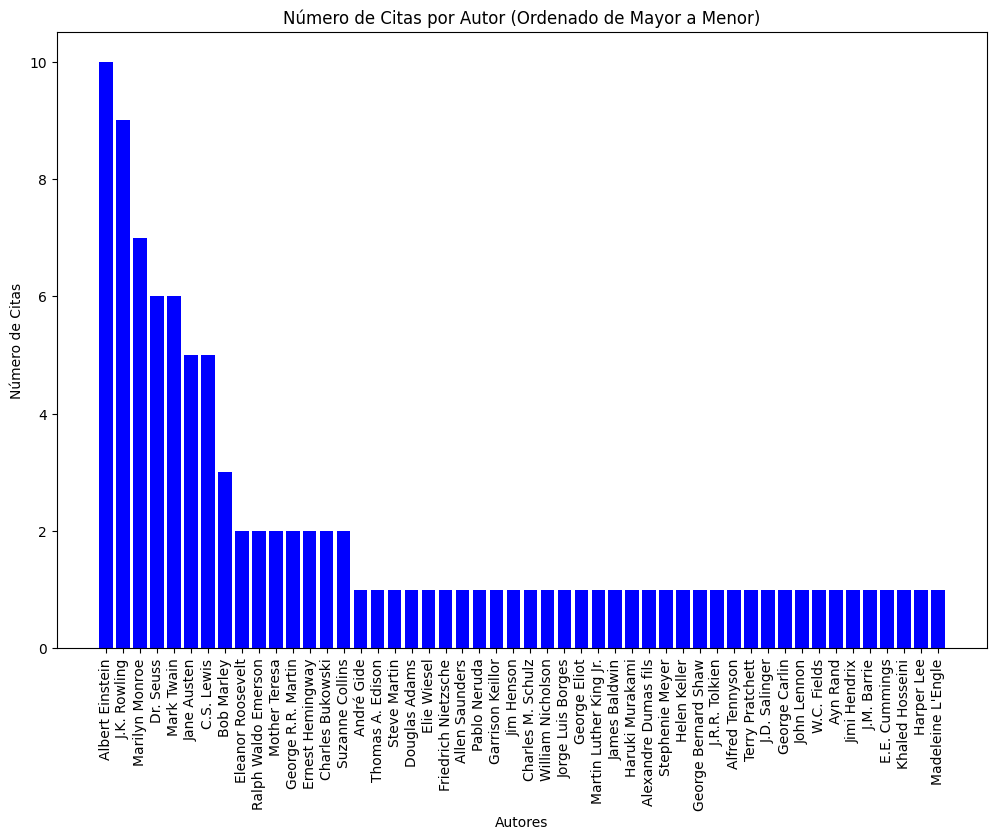

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter

base_url = "https://quotes.toscrape.com/page/{}/"
author_counts = Counter()
max_pages = 10

for page_num in range(1, max_pages + 1):
    url = base_url.format(page_num)

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            author = quote.find('small', class_='author')
            if author:
                author_name = author.get_text(strip=True)
                author_counts[author_name] += 1
    else:
        print(f"Error al acceder a la página {page_num}")

sorted_author_counts = dict(sorted(author_counts.items(), key=lambda item: item[1], reverse=True))

for author, count in sorted_author_counts.items():
    print(f"{author}: {count} citas")

authors, counts = zip(*sorted_author_counts.items())
plt.figure(figsize=(12, 8))
plt.bar(authors, counts, color='blue')
plt.xlabel('Autores')
plt.ylabel('Número de Citas')
plt.title('Número de Citas por Autor (Ordenado de Mayor a Menor)')
plt.xticks(rotation=90)
plt.show()


## Apartado 3 (0,75 ptos)

Gracias a la gráfica resultante del apartado anterior, se descubre que **Albert Einstein, J.K. Rowling, Marilyn Monroe, Dr. Seuss y Mark Twain** son las personas célebres con más citas en dicha página.

Elabora una gráfica con la distribución de cada uno de los autores en base a las 5 etiquetas más populares. Estas etiquetas son: **"love", "inspirational", "life", "humor" y "books"**. Para la elaboración de esta gráfica, **un cita podrá repetirse si está en diferentes etiquetas**.

Puedes hacer uso de esta [página web  donde te muestran como elaborar este tipo de gráficos con múltiples barras](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/).

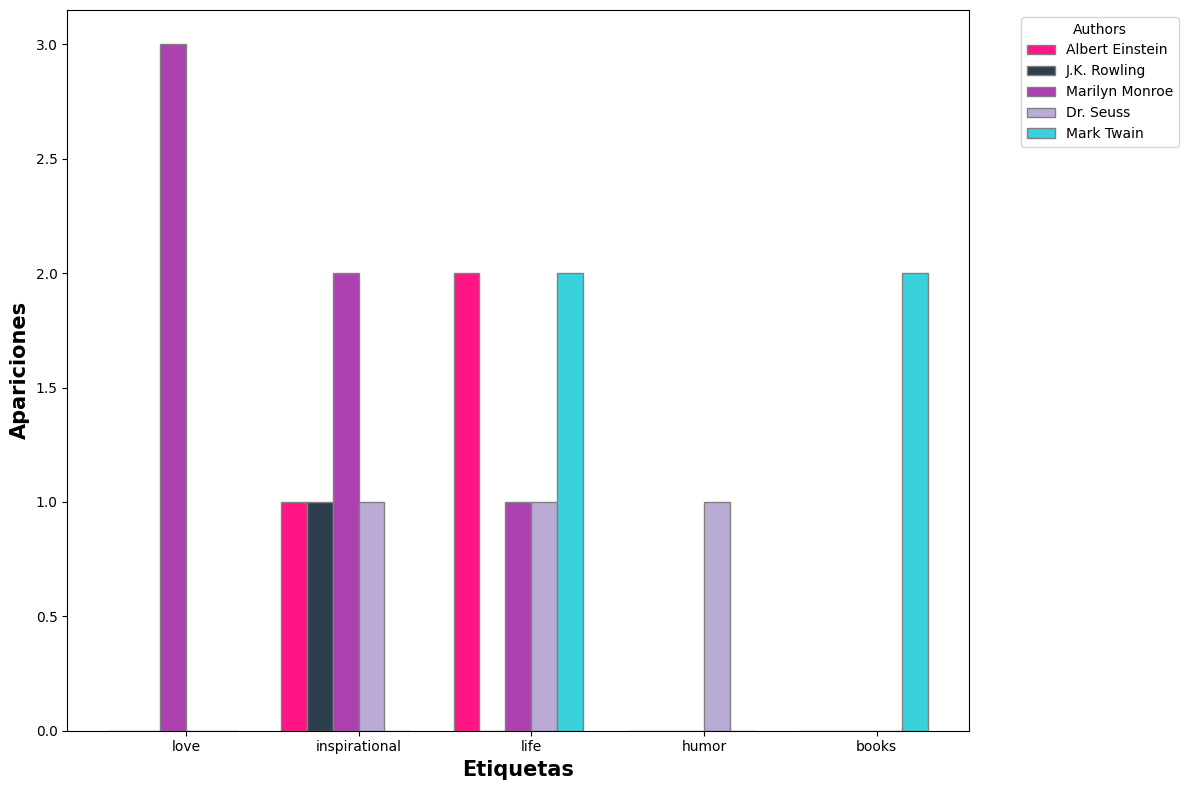

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

base_url = "https://quotes.toscrape.com/page/{}/"
authors = ['Albert Einstein', 'J.K. Rowling', 'Marilyn Monroe', 'Dr. Seuss', 'Mark Twain']
tags_to_count = ['love', 'inspirational', 'life', 'humor', 'books']

author_tag_counts = {author: {tag: 0 for tag in tags_to_count} for author in authors}
max_pages = 10

for page_num in range(1, max_pages + 1):
    url = base_url.format(page_num)
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            quote_text = quote.find('span', class_='text').get_text(strip=True)
            author = quote.find('small', class_='author').get_text(strip=True)
            tags = quote.find('div', class_='tags').find_all('a', class_='tag')
            tag_list = [tag.get_text() for tag in tags]

            if author in author_tag_counts:
                for tag in tag_list:
                    if tag in tags_to_count:
                        author_tag_counts[author][tag] += 1
    else:
        print(f"Error al acceder a la página {page_num}")

data = []
for author in authors:
    data.append([author_tag_counts[author][tag] for tag in tags_to_count])

barWidth = 0.15
fig = plt.subplots(figsize=(12, 8))

br = np.arange(len(tags_to_count))

for i, author in enumerate(authors):
    plt.bar(br + i * barWidth, data[i], color=np.random.rand(3,), width=barWidth, edgecolor='grey', label=author)


plt.xlabel('Etiquetas', fontweight='bold', fontsize=15)
plt.ylabel('Apariciones', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth * (len(authors) / 2) for r in range(len(tags_to_count))], tags_to_count)
plt.legend(title="Authors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Apartado 4 (0,25 ptos)
[TextBlob](https://textblob.readthedocs.io/en/dev/) es una biblioteca de procesamiento de lenguaje natural capaz de realizar un análisis de sentimientos básicos.

Para ello calcula dos métricas:
* Polaridad: mide el sentimiento general del texto.
* Subjetividad: mide el grado de subjetividad del texto.

Nos centraremos en la primera métrica. Guarda las citas de Marilyn Monroe que obtuviste en la parte 1 en una lista. Debes crear un código en Python para recorrer las citas y determinar si dicha cita es 'Positiva', 'Negativa' o 'Neutral'. **Las condiciones son estas:**
* Una cita es positiva si su polaridad es superior a 0.
* Una cita es negativa si su polaridad es inferior a 0.
* Una cita es neutral si su polaridad es igual a 0.

Debes printear cada cita por pantalla, de la siguiente manera:
```
Cita: “A wise girl kisses but doesn't love, listens but doesn't believe, and leaves before she is left.”
Sentimiento: Positivo
```

Comenzamos recuperando las citas de Marilyn

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://quotes.toscrape.com/page/{}/"

marilyn_quotes = []

max_pages = 10

for page_num in range(1, max_pages + 1):
    url = base_url.format(page_num)

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            author = quote.find('small', class_='author')
            if author and author.get_text(strip=True) == 'Marilyn Monroe':
                text = quote.find('span', class_='text')
                if text:
                    marilyn_quotes.append(text.get_text(strip=True))
    else:
        print(f"Error al acceder a la página {page_num}")

for quote in marilyn_quotes:
    print(quote)



Total de citas de Marilyn Monroe: 7
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always

In [ ]:
!python -m textblob.download_corpora

from textblob import TextBlob


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from textblob import TextBlob
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

marilyn_quotes = [
    "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
    "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly, keep smiling, because life's a beautiful thing and there's so much to smile about.”",
    "“You believe lies so you eventually learn to trust no one but yourself.”",
    "“If you can make a woman laugh, you can make her do anything.”",
    "“The real lover is the man who can thrill you by kissing your forehead or smiling into your eyes or just staring into space.”",
    "“A wise girl kisses but doesn't love, listens but doesn't believe, and leaves before she is left.”",
    "“I am good, but not an angel. I do sin, but I am not the devil. I am just a small girl in a big world trying to find someone to love.”"]

for quote in marilyn_quotes:
    blob = TextBlob(quote)

    sentiment_polarity = blob.sentiment.polarity

    if sentiment_polarity > 0:
        sentiment = "Positivo"
    elif sentiment_polarity < 0:
        sentiment = "Negativo"
    else:
        sentiment = "Neutral"

    print(f'Cita: "{quote}"')
    print(f'Sentimiento: {sentiment}')
    print("---")



Cita: "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"
Sentimiento: Negativo
---
Cita: "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and a

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Ejercicio 6 - Acceso a datos abiertos por API (2,5 ptos)

El INE (Instituto Nacional de Estadística) es la institución pública en España encargada de la recolección, análisis y publicación de datos estadísticos sobre diversos aspectos socieconómicos, demográficos y geográficos.

El INE proporciona una [API](https://www.ine.es/dyngs/DataLab/manual.html?cid=45) en abierto que permite a los desarrolladores consultar datos de manera directa. También ofrece una [documentación para poder navegar por los diferentes endpoints disponibles](https://www.ine.es/dyngs/DataLab/manual.html?cid=47).

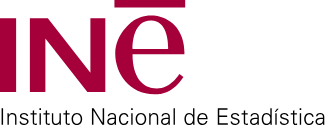

## Apartado 1 (0,5 ptos)

Usando la API pública y la documentación disponible, se desea **descargar** los datos de las **"Viviendas turísticas en España"**. En concreto, deseamos obtener el "**Porcentaje de viviendas turísticas sobre el total de viviendas censadas**" a nivel nacional, autonómico y provincial. Queremos obtener el valor de **todos los datos** desde que se empezó a registrar esta información.

Dichos datos deseamos almacenarlos en un formato **`.csv`**, bajo el nombre de **`viviendas_turisticas.csv`**. Cada campo del CSV debe estar delimitado por un `;`. El INE ofrece una opción para [devolver la información directamente en formato `CSV`](https://www.ine.es/dynt3/inebase/es/APIdownTabla.htm?t=67223#_conten1).

Para la elaboración de este ejercicio, puedes apoyarte de la [siguiente URL](https://www.ine.es/dyngs/DataLab/es/manual.html?cid=66), que te permite generar los endpoints de una manera sencilla e interactiva. En concreto, en dicha página nos interesa obtener los **datos de serie** de la operación estadística sobre las viviendas turísticas en España.

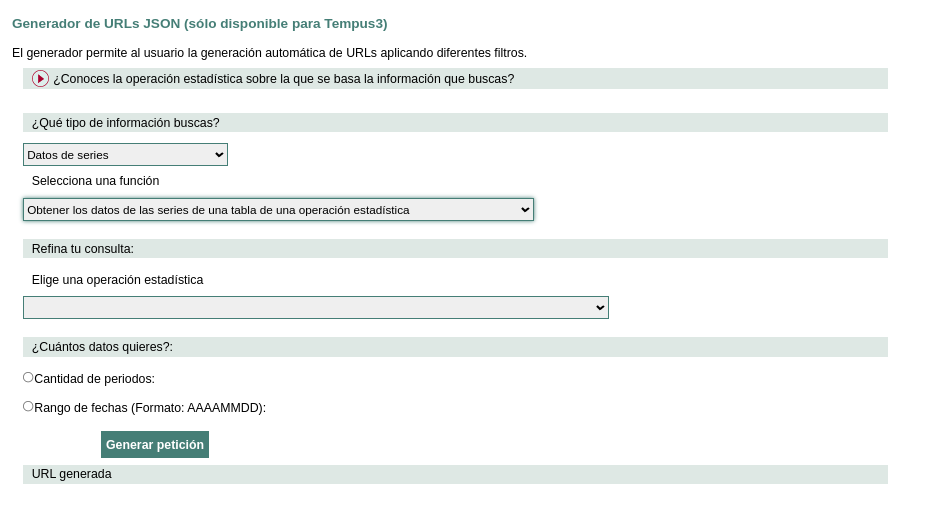

Hacemos una busqueda como se nos indica en la web de INE y nos genera la URL que usamos para obterner los datos.
Echamos un vistazo a los datos.

Ahora como nos indica el ejercicio, vamos a almacenarlos en un csv, es decir, almacenamos el contenido en nuestro CSV. Usamos la función open.
https://python-intermedio.readthedocs.io/es/latest/open_function.html
Seguimos las indicaciones del ejercicio para obtenerlos en csv. **Nos fijamos que no sea la tabla de ejemplo**
https://servicios.ine.es/wstempus/csv_sc/ES/DATOS_TABLA/39364"

In [ ]:
import requests

url = "https://servicios.ine.es/wstempus/csv_sc/ES/DATOS_TABLA/39365"

response = requests.get(url)

if response.status_code == 200:
    with open("viviendas_turisticas.csv", "wb") as file:
        file.write(response.content)
    print("El archivo CSV se ha descargado correctamente con el nombre 'viviendas_turisticas.csv'.")
else:
    print(f"Error al descargar el archivo CSV: {response.status_code}")


El archivo CSV se ha descargado correctamente con el nombre 'viviendas_turisticas.csv'.


Creamos el dataframe como en el ejercicio 4. Usamos el separador punto y coma (como nos indica el ejercicio)

In [ ]:
import pandas as pd
df = pd.read_csv('viviendas_turisticas.csv', sep = ';')
df.head()


,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Periodo,Total
0,Total Nacional,NaN,NaN,2024M08,"1,5"
1,Total Nacional,NaN,NaN,2024M02,"1,33"
2,Total Nacional,NaN,NaN,2023M08,"1,29"
3,Total Nacional,NaN,NaN,2023M02,"1,21"
4,Total Nacional,NaN,NaN,2022M08,"1,24"


**NOTA:** debes tener especialmente cuidado cuando trates de descargar el CSV a través de la API, pues caracteres especiales en la URL como `:` pueden provocar errores en la solicitud. La mejor manera de solventar esto es **eliminando el parámetro `date` de la solicitud**.

## Apartado 2 (0,75 ptos)

Con la ayuda de librerías como [`matplotlib`](https://matplotlib.org/stable/plot_types/index.html) y [`pandas`](https://pandas.pydata.org/), trata de elaborar un gráfico que demuestre el aumento (o disminución) de la vivienda turística en la Comunidad Autónoma en la que vives y también de tu provincia. Comenta brevemente qué se observa en el gráfico.

Debe ser un gráfico similar al siguiente:

Primero averiguamos qué tipo de columnas tenemos en el DF, ya que tenemos que hacer unos subdfs de las comunidades y provincias.

In [ ]:
df.columns

Index(['Total Nacional', 'Comunidades y Ciudades Autónomas', 'Provincias',
       'Periodo', 'Total'],
      dtype='object')

Verificamos los valores únicos en las columnas 'Comunidades y Ciudades Autónomas' y 'Provincias' ya que estamos centrandonos en Madrid y la comunidad.

In [ ]:
print("Valores únicos en 'Comunidades y Ciudades Autónomas':")
print(df['Comunidades y Ciudades Autónomas'].unique())

print("\nValores únicos en 'Provincias':")
print(df['Provincias'].unique())

Valores únicos en 'Comunidades y Ciudades Autónomas':
[nan '01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La' '18 Ceuta' '19 Melilla']

Valores únicos en 'Provincias':
[nan '04 Almería' '11 Cádiz' '14 Córdoba' '18 Granada' '21 Huelva'
 '23 Jaén' '29 Málaga' '41 Sevilla' '22 Huesca' '44 Teruel' '50 Zaragoza'
 '33 Asturias' '07 Balears, Illes' '35 Palmas, Las'
 '38 Santa Cruz de Tenerife' '39 Cantabria' '05 Ávila' '09 Burgos'
 '24 León' '34 Palencia' '37 Salamanca' '40 Segovia' '42 Soria'
 '47 Valladolid' '49 Zamora' '02 Albacete' '13 Ciudad Real' '16 Cuenca'
 '19 Guadalajara' '45 Toledo' '08 Barcelona' '17 Girona' '25 Lleida'
 '43 Tarragona' '03 Alicante/Alacant' '12 Castellón/Castelló'
 '46 Valencia/Va

Hacemos los mismo pero con los valores en la columna 'Periodo'

In [ ]:
print(df['Periodo'].unique())

['2024M08' '2024M02' '2023M08' '2023M02' '2022M08' '2022M02' '2021M08'
 '2021M02' '2020M08']


En este punto, tenemos que hacer un subdf con los contenidos de Madrid, seleccionamos el nombre correctamente de cada uno como nos indica el dataset.

In [ ]:
df_madrid = df[
    (df['Comunidades y Ciudades Autónomas'] == '13 Madrid, Comunidad de') |
    (df['Provincias'] == '28 Madrid')
]
print(df_madrid.head(100))

     Total Nacional Comunidades y Ciudades Autónomas Provincias  Periodo Total
504  Total Nacional          13 Madrid, Comunidad de        NaN  2024M08  0,76
505  Total Nacional          13 Madrid, Comunidad de        NaN  2024M02  0,66
506  Total Nacional          13 Madrid, Comunidad de        NaN  2023M08  0,57
507  Total Nacional          13 Madrid, Comunidad de        NaN  2023M02  0,56
508  Total Nacional          13 Madrid, Comunidad de        NaN  2022M08  0,54
509  Total Nacional          13 Madrid, Comunidad de        NaN  2022M02  0,53
510  Total Nacional          13 Madrid, Comunidad de        NaN  2021M08   0,6
511  Total Nacional          13 Madrid, Comunidad de        NaN  2021M02  0,61
512  Total Nacional          13 Madrid, Comunidad de        NaN  2020M08  0,68
513  Total Nacional          13 Madrid, Comunidad de  28 Madrid  2024M08  0,76
514  Total Nacional          13 Madrid, Comunidad de  28 Madrid  2024M02  0,66
515  Total Nacional          13 Madrid, Comunidad de

Para poder diferenciarlos vamos a utilizar el nombre de provincias (sin datos) para poder tener tanto comunidad como provincia, pero los datos son idénticos.

In [ ]:
df_comunidad_madrid = df[
    (df['Comunidades y Ciudades Autónomas'] == '13 Madrid, Comunidad de') &
    (df['Provincias'].isna())]
df_provincia_madrid = df[df['Provincias'] == '28 Madrid']

print("DataFrame Comunidad de Madrid:")
print(df_comunidad_madrid)

print("DataFrame Provincia de Madrid:")
print(df_provincia_madrid)



DataFrame Comunidad de Madrid:
     Total Nacional Comunidades y Ciudades Autónomas Provincias  Periodo Total
504  Total Nacional          13 Madrid, Comunidad de        NaN  2024M08  0,76
505  Total Nacional          13 Madrid, Comunidad de        NaN  2024M02  0,66
506  Total Nacional          13 Madrid, Comunidad de        NaN  2023M08  0,57
507  Total Nacional          13 Madrid, Comunidad de        NaN  2023M02  0,56
508  Total Nacional          13 Madrid, Comunidad de        NaN  2022M08  0,54
509  Total Nacional          13 Madrid, Comunidad de        NaN  2022M02  0,53
510  Total Nacional          13 Madrid, Comunidad de        NaN  2021M08   0,6
511  Total Nacional          13 Madrid, Comunidad de        NaN  2021M02  0,61
512  Total Nacional          13 Madrid, Comunidad de        NaN  2020M08  0,68
DataFrame Provincia de Madrid:
     Total Nacional Comunidades y Ciudades Autónomas Provincias  Periodo Total
513  Total Nacional          13 Madrid, Comunidad de  28 Madrid  2024

Gráficamos, pero evidentemente solo veremos una gráfica, esto es como se indico anteriormente los datos son iguales. Se hace una exploración manual del CSV y corroboramos que los datos están duplicandos.
Como dato curioso, debemos renombrar de , a . los datos de la columna totales para poder gráficar correctamente.

<ipython-input-9-05ddf6aefb59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comunidad_madrid['Total'] = df_comunidad_madrid['Total'].replace({',': '.'}, regex=True)
<ipython-input-9-05ddf6aefb59>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comunidad_madrid['Total'] = pd.to_numeric(df_comunidad_madrid['Total'], errors='coerce')
<ipython-input-9-05ddf6aefb59>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

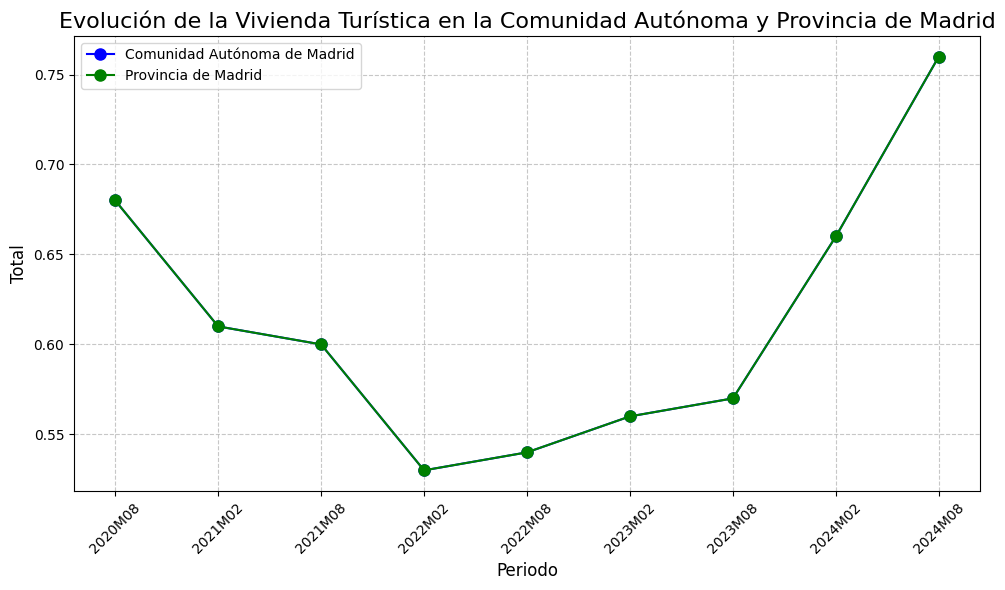

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_comunidad_madrid = df[
    (df['Comunidades y Ciudades Autónomas'] == '13 Madrid, Comunidad de') &
    (df['Provincias'].isna())]

df_provincia_madrid = df[df['Provincias'] == '28 Madrid']

df_comunidad_madrid['Total'] = df_comunidad_madrid['Total'].replace({',': '.'}, regex=True)
df_comunidad_madrid['Total'] = pd.to_numeric(df_comunidad_madrid['Total'], errors='coerce')

df_provincia_madrid['Total'] = df_provincia_madrid['Total'].replace({',': '.'}, regex=True)
df_provincia_madrid['Total'] = pd.to_numeric(df_provincia_madrid['Total'], errors='coerce')

periodos = ['2024M08', '2024M02', '2023M08', '2023M02', '2022M08', '2022M02', '2021M08', '2021M02', '2020M08']

totales_comunidad = []
totales_provincia = []

for periodo in periodos:
    df_comunidad = df_comunidad_madrid[df_comunidad_madrid['Periodo'] == periodo]

    df_provincia = df_provincia_madrid[df_provincia_madrid['Periodo'] == periodo]

    total_comunidad = df_comunidad['Total'].values[0] if not df_comunidad.empty else None
    total_provincia = df_provincia['Total'].values[0] if not df_provincia.empty else None

    totales_comunidad.append(total_comunidad)
    totales_provincia.append(total_provincia)

periodos_invertidos = list(reversed(periodos))

totales_comunidad_invertidos = list(reversed(totales_comunidad))
totales_provincia_invertidos = list(reversed(totales_provincia))

plt.figure(figsize=(10, 6))
plt.plot(periodos_invertidos, totales_comunidad_invertidos, marker='o', color='b', linestyle='-', markersize=8, label='Comunidad Autónoma de Madrid')
plt.plot(periodos_invertidos, totales_provincia_invertidos, marker='o', color='g', linestyle='-', markersize=8, label='Provincia de Madrid')
plt.title('Evolución de la Vivienda Turística en la Comunidad Autónoma y Provincia de Madrid', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Hacemos los mismo pero usamos en la API los datos por municipios, vamos a comparar Collado Villalba, ciudad natal, con la comunidad de Madrid.
Realizamos mismos procesos.

In [ ]:
import requests

url = "https://servicios.ine.es/wstempus/csv_sc/ES/DATOS_TABLA/39366"

response = requests.get(url)

if response.status_code == 200:
    with open("viviendas_turisticas.csv", "wb") as file:
        file.write(response.content)
    print("El archivo CSV se ha descargado correctamente con el nombre 'viviendas_turisticas.csv'.")
else:
    print(f"Error al descargar el archivo CSV: {response.status_code}")

El archivo CSV se ha descargado correctamente con el nombre 'viviendas_turisticas.csv'.


In [ ]:
import pandas as pd
df = pd.read_csv('viviendas_turisticas.csv', sep = ';')
df.head()

,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Municipios,Periodo,Total
0,Total Nacional,NaN,NaN,NaN,2024M08,"1,5"
1,Total Nacional,NaN,NaN,NaN,2024M02,"1,33"
2,Total Nacional,NaN,NaN,NaN,2023M08,"1,29"
3,Total Nacional,NaN,NaN,NaN,2023M02,"1,21"
4,Total Nacional,NaN,NaN,NaN,2022M08,"1,24"


In [ ]:
df_provincia = df[df['Comunidades y Ciudades Autónomas'] == '13 Madrid, Comunidad de']
df_municipio = df[df['Municipios'] == '28047 Collado Villalba']

print("Primer DataFrame (df_provincia):")
print(df_provincia.head())

print("\nSegundo DataFrame (df_municipio):")
print(df_municipio.head())


Primer DataFrame (df_provincia):
       Total Nacional Comunidades y Ciudades Autónomas Provincias Municipios  \
65439  Total Nacional          13 Madrid, Comunidad de        NaN        NaN   
65440  Total Nacional          13 Madrid, Comunidad de        NaN        NaN   
65441  Total Nacional          13 Madrid, Comunidad de        NaN        NaN   
65442  Total Nacional          13 Madrid, Comunidad de        NaN        NaN   
65443  Total Nacional          13 Madrid, Comunidad de        NaN        NaN   

       Periodo Total  
65439  2024M08  0,76  
65440  2024M02  0,66  
65441  2023M08  0,57  
65442  2023M02  0,56  
65443  2022M08  0,54  

Segundo DataFrame (df_municipio):
       Total Nacional Comunidades y Ciudades Autónomas Provincias  \
65844  Total Nacional          13 Madrid, Comunidad de  28 Madrid   
65845  Total Nacional          13 Madrid, Comunidad de  28 Madrid   
65846  Total Nacional          13 Madrid, Comunidad de  28 Madrid   
65847  Total Nacional          13 Mad

In [ ]:
periodos_provincia = df_provincia['Periodo'].unique()

print("Periodos únicos en df_provincia:")
print(periodos_provincia)


Periodos únicos en df_provincia:
['2024M08' '2024M02' '2023M08' '2023M02' '2022M08' '2022M02' '2021M08'
 '2021M02' '2020M08']


Para obtener los valores, se hace la media ponderada de cada periodo de todos los municipios

In [ ]:
df_provincia['Total'] = df_provincia['Total'].str.replace(',', '.')

df_provincia = df_provincia[df_provincia['Total'].str.match(r'^-?\d+(\.\d+)?$', na=False)]
df_provincia['Total'] = df_provincia['Total'].astype(float)
media_totales_provincia = df_provincia.groupby('Periodo')['Total'].mean().reset_index()
media_totales_provincia.rename(columns={'Total': 'Media_Total'}, inplace=True)

print("Media de los valores 'Total' en cada periodo de df_provincia:")
print(media_totales_provincia)


Media de los valores 'Total' en cada periodo de df_provincia:
   Periodo  Media_Total
0  2020M08     0.462762
1  2021M02     0.487845
2  2021M08     0.533425
3  2022M02     0.502431
4  2022M08     0.574254
5  2023M02     0.593370
6  2023M08     0.523642
7  2024M02     0.545780
8  2024M08     0.580520


<ipython-input-22-f51cd899715f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_provincia['Total'] = df_provincia['Total'].str.replace(',', '.')
<ipython-input-22-f51cd899715f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_provincia['Total'] = df_provincia['Total'].astype(float)


<ipython-input-24-4b30c695f5f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipio['Total'] = df_municipio['Total'].replace({',': '.'}, regex=True)
<ipython-input-24-4b30c695f5f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipio['Total'] = pd.to_numeric(df_municipio['Total'], errors='coerce')


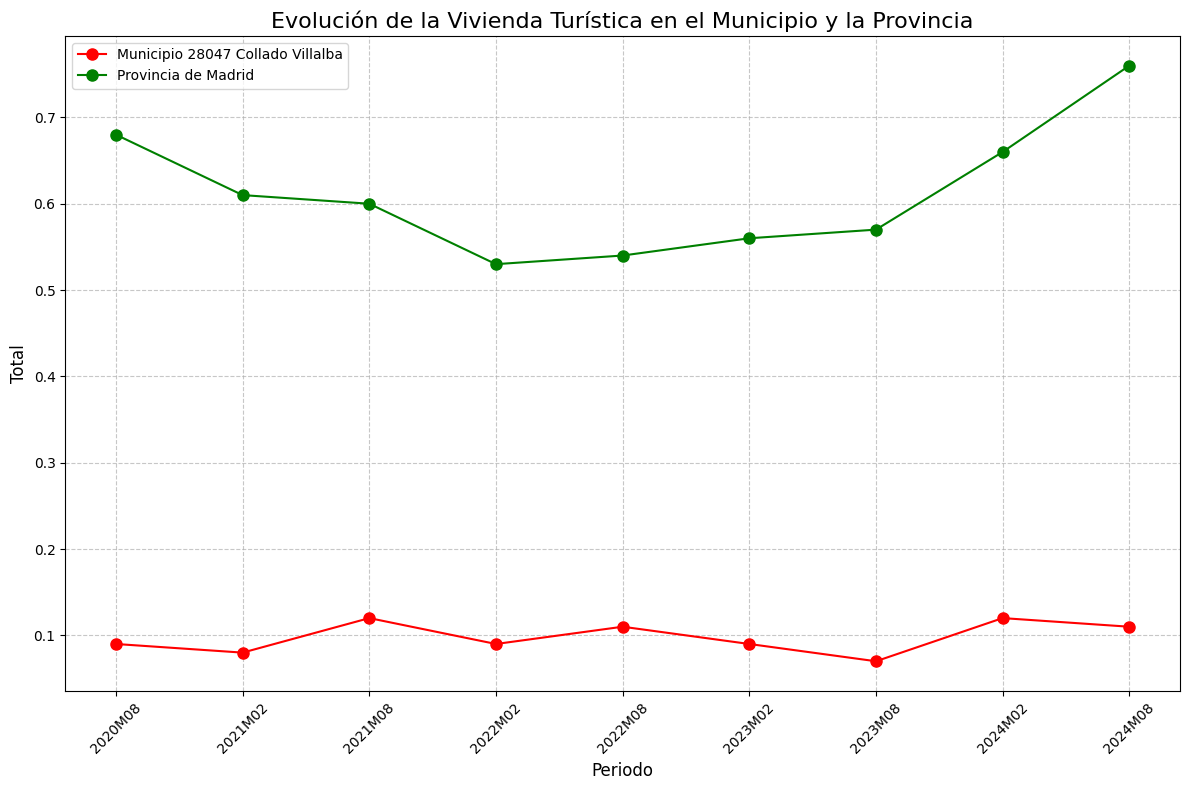

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_municipio['Total'] = df_municipio['Total'].replace({',': '.'}, regex=True)
df_municipio['Total'] = pd.to_numeric(df_municipio['Total'], errors='coerce')
df_provincia_madrid['Total'] = df_provincia_madrid['Total'].replace({',': '.'}, regex=True)
df_provincia_madrid['Total'] = pd.to_numeric(df_provincia_madrid['Total'], errors='coerce')

totales_municipio = []
totales_provincia = []

for periodo in periodos:
    df_municipio_periodo = df_municipio[df_municipio['Periodo'] == periodo]

    df_provincia_periodo = df_provincia_madrid[df_provincia_madrid['Periodo'] == periodo]

    total_municipio = df_municipio_periodo['Total'].values[0] if not df_municipio_periodo.empty else None
    total_provincia = df_provincia_periodo['Total'].values[0] if not df_provincia_periodo.empty else None

    totales_municipio.append(total_municipio)
    totales_provincia.append(total_provincia)

periodos_invertidos = list(reversed(periodos))
totales_municipio_invertidos = list(reversed(totales_municipio))
totales_provincia_invertidos = list(reversed(totales_provincia))

plt.figure(figsize=(12, 8))
plt.plot(periodos_invertidos, totales_municipio_invertidos, marker='o', color='r', linestyle='-', markersize=8, label='Municipio 28047 Collado Villalba')
plt.plot(periodos_invertidos, totales_provincia_invertidos, marker='o', color='g', linestyle='-', markersize=8, label='Provincia de Madrid')
plt.title('Evolución de la Vivienda Turística en el Municipio y la Provincia', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Vamos a replicar el ejemplo para ver si nuestros datos son correctos y poder hacer una comparativa. Se siguen los mismos pasos que mi ejemplo pero con las variables del ejemplo.

In [ ]:
import requests

url = "https://servicios.ine.es/wstempus/csv_sc/ES/DATOS_TABLA/39365"

response = requests.get(url)

if response.status_code == 200:
    with open("viviendas_turisticas.csv", "wb") as file:
        file.write(response.content)
    print("El archivo CSV se ha descargado correctamente con el nombre 'viviendas_turisticas.csv'.")
else:
    print(f"Error al descargar el archivo CSV: {response.status_code}")

El archivo CSV se ha descargado correctamente con el nombre 'viviendas_turisticas.csv'.


In [ ]:
import pandas as pd
df = pd.read_csv('viviendas_turisticas.csv', sep = ';')
df.head()


,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Periodo,Total
0,Total Nacional,NaN,NaN,2024M08,"1,5"
1,Total Nacional,NaN,NaN,2024M02,"1,33"
2,Total Nacional,NaN,NaN,2023M08,"1,29"
3,Total Nacional,NaN,NaN,2023M02,"1,21"
4,Total Nacional,NaN,NaN,2022M08,"1,24"


In [ ]:
import pandas as pd

df_galicia_acoruña = df[
    (df['Comunidades y Ciudades Autónomas'] == '12 Galicia') |
    (df['Provincias'] == '15 A Coruña')]

periodos = ['2024M08', '2024M02', '2023M08', '2023M02', '2022M08', '2022M02', '2021M08', '2021M02', '2020M08']

sub_dfs = {}

for periodo in periodos:
    sub_dfs[periodo] = df_galicia_acoruña[df_galicia_acoruña['Periodo'] == periodo]

    print(f"Sub-DataFrame para el periodo {periodo}:")
    print(sub_dfs[periodo].head(), "\n")

Sub-DataFrame para el periodo 2024M08:
     Total Nacional Comunidades y Ciudades Autónomas     Provincias  Periodo  \
459  Total Nacional                       12 Galicia            NaN  2024M08   
468  Total Nacional                       12 Galicia   15 Coruña, A  2024M08   
477  Total Nacional                       12 Galicia        27 Lugo  2024M08   
486  Total Nacional                       12 Galicia     32 Ourense  2024M08   
495  Total Nacional                       12 Galicia  36 Pontevedra  2024M08   

    Total  
459  1,25  
468  1,18  
477  1,11  
486  0,43  
495  1,83   

Sub-DataFrame para el periodo 2024M02:
     Total Nacional Comunidades y Ciudades Autónomas     Provincias  Periodo  \
460  Total Nacional                       12 Galicia            NaN  2024M02   
469  Total Nacional                       12 Galicia   15 Coruña, A  2024M02   
478  Total Nacional                       12 Galicia        27 Lugo  2024M02   
487  Total Nacional                       12 Ga

<ipython-input-32-b4c85b3e6cf7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_galicia_acoruña['Total'] = df_galicia_acoruña['Total'].replace({',': '.'}, regex=True)  # Reemplazar comas por puntos


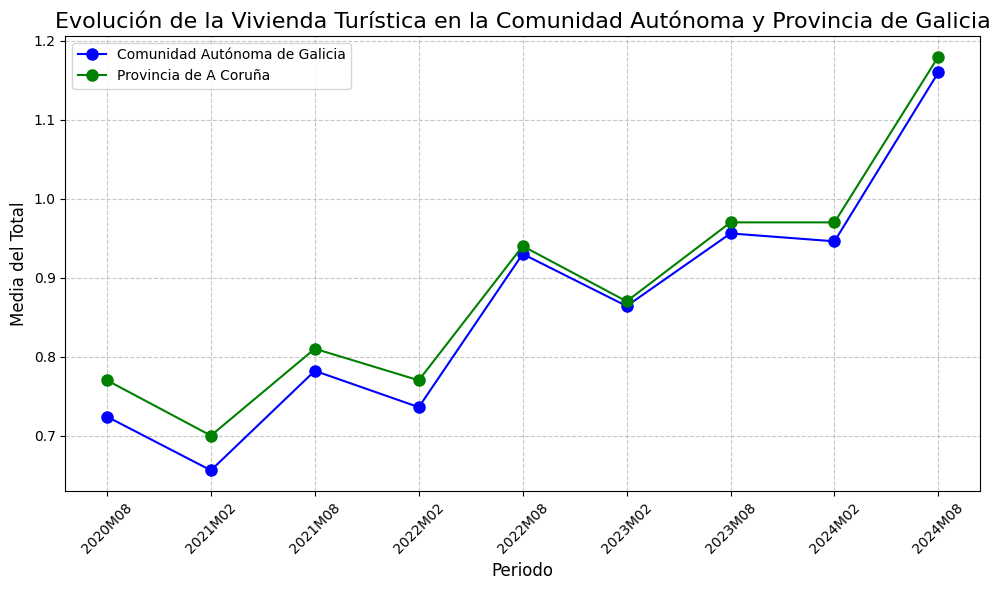

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_galicia_acoruña = df[
    (df['Comunidades y Ciudades Autónomas'] == '12 Galicia') |
    (df['Provincias'] == '15 Coruña, A')]

df_galicia_acoruña['Total'] = df_galicia_acoruña['Total'].replace({',': '.'}, regex=True)  # Reemplazar comas por puntos
df_galicia_acoruña.loc[:, 'Total'] = pd.to_numeric(df_galicia_acoruña['Total'], errors='coerce')  # Convertir a numérico

periodos = ['2024M08', '2024M02', '2023M08', '2023M02', '2022M08', '2022M02', '2021M08', '2021M02', '2020M08']

medias_comunidad = {}
medias_provincia = {}

for periodo in periodos:
    df_comunidad = df_galicia_acoruña[(df_galicia_acoruña['Periodo'] == periodo) & (df_galicia_acoruña['Comunidades y Ciudades Autónomas'] == '12 Galicia')]
    df_provincia = df_galicia_acoruña[(df_galicia_acoruña['Periodo'] == periodo) & (df_galicia_acoruña['Provincias'] == '15 Coruña, A')]

    media_comunidad = df_comunidad['Total'].mean()
    media_provincia = df_provincia['Total'].mean()

    medias_comunidad[periodo] = media_comunidad
    medias_provincia[periodo] = media_provincia

periodos_ordenados = sorted(periodos)

medias_comunidad_ordenadas = [medias_comunidad[periodo] for periodo in periodos_ordenados]
medias_provincia_ordenadas = [medias_provincia[periodo] for periodo in periodos_ordenados]

plt.figure(figsize=(10, 6))
plt.plot(periodos_ordenados, medias_comunidad_ordenadas, marker='o', color='b', linestyle='-', markersize=8, label='Comunidad Autónoma de Galicia')
plt.plot(periodos_ordenados, medias_provincia_ordenadas, marker='o', color='g', linestyle='-', markersize=8, label='Provincia de A Coruña')
plt.title('Evolución de la Vivienda Turística en la Comunidad Autónoma y Provincia de Galicia', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Media del Total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


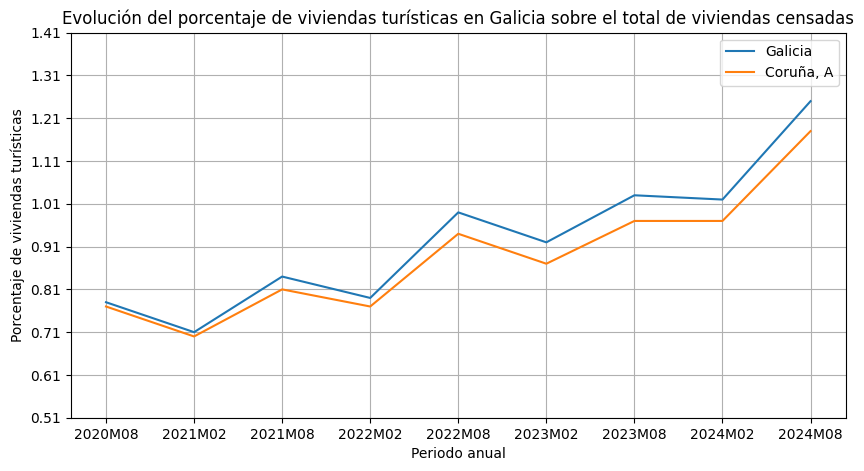

## Apartado 3 (1,25 pto)

Con lo que has aprendido sobre el INE, el siguiente paso será **buscar y descargar datos estadísticos que te parezcan interesantes y representarlos en una gráfica**. En base a los datos obtenidos y a la gráfica generada, haz un breve **comentario** sobre la situación actual del dato estadístico.

Por ejemplo, podrías representar la tasa de paro en los últimos años, el aumento del precio de la vivienda en alquiler, los índices de población en los últimos años...

**¿Qué se va a valorar?**
- Se valorará que la gráfica resuma correctamente los datos y que incluya toda la información necesaria para su interpretación.
- Claridad del comentario y coherencia con la gráfica.
- El uso y la integración de 2 datos estadísticos se valorará positivamente.

Importamos desde la API de INE los datos relacionados con crimenes por nacionalidad, hacemos la diferenciación entre Adultos y Menores.

In [51]:
import requests

url = "https://servicios.ine.es/wstempus/csv_sc/ES/DATOS_TABLA/26021"

response = requests.get(url)

if response.status_code == 200:
    with open("crimenes_nacionalidad_adultos.csv", "wb") as file:
        file.write(response.content)
    print("El archivo CSV se ha descargado correctamente con el nombre 'crimenes_nacionalidad_adultos.csv'")
else:
    print(f"Error al descargar el archivo CSV: {response.status_code}")


El archivo CSV se ha descargado correctamente con el nombre 'crimenes_nacionalidad_adultos.csv'


In [52]:

import requests

url = "https://servicios.ine.es/wstempus/csv_sc/ES/DATOS_TABLA/26032"

response = requests.get(url)

if response.status_code == 200:
    with open("crimenes_nacionalidad_menores.csv", "wb") as file:
        file.write(response.content)
    print("El archivo CSV se ha descargado correctamente con el nombre 'crimenes_nacionalidad_menores.csv'")
else:
    print(f"Error al descargar el archivo CSV: {response.status_code}")



El archivo CSV se ha descargado correctamente con el nombre 'crimenes_nacionalidad_menores.csv'


In [54]:
import pandas as pd
dfadultos = pd.read_csv('crimenes_nacionalidad_adultos.csv', sep = ';')
dfmenores = pd.read_csv('crimenes_nacionalidad_menores.csv', sep = ';')


Vamos analizar ambos dfs para hacer un análisis sobre la nacionalidad y el periodo.


In [63]:
dfadultos.columns

Index(['Lugar de condena', 'Nacionalidad', 'Periodo', 'Total'], dtype='object')

In [61]:
dfmenores.columns

Index(['Lugar de condena', 'Tipo de infracción', 'Nacionalidad', 'Periodo',
       'Total'],
      dtype='object')

Seguimos con la identificación de los valores únicos por columnas de ambos dataframes y así seleccionar los nombre a analizar

In [64]:
for columna in dfadultos.columns:
    print(f"Columna: {columna}")
    print(dfadultos[columna].unique())
    print("-----------")

Columna: Lugar de condena
['Total Nacional' '01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La' '18 Ceuta' '19 Melilla']
-----------
Columna: Nacionalidad
['Total' 'Española' 'País de la UE28 sin España'
 'País de la UE27_2020 sin España' 'País de Europa menos UE28'
 'País de Europa menos UE27_2020' 'De Africa' 'De América' 'De Asia'
 'De Oceanía']
-----------
Columna: Periodo
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013]
-----------
Columna: Total
[403.194 426.416 410.842 ... 877.    931.    829.   ]
-----------


In [66]:
for columna in dfmenores.columns:
    print(f"Columna: {columna}")
    print(dfmenores[columna].unique())
    print("-----------")

Columna: Lugar de condena
['Total Nacional' '01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La' '18 Ceuta' '19 Melilla']
-----------
Columna: Tipo de infracción
['Total Infracciones' 'A Delitos' 'B Faltas']
-----------
Columna: Nacionalidad
['Total' 'Española' 'Extranjera']
-----------
Columna: Periodo
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013]
-----------
Columna: Total
[ 23.662  25.822  26.349  20.366  26.049  24.34   23.05   21.986  24.005
  25.717  25.814  18.417  20.021  20.59   15.602  20.139  19.294  18.252
  17.095  18.721  19.67   19.278   5.245   5.801   5.759   4.764   5.91
   5.046   4.798   4.891   5.284   6.047   6.536  22.269  19.865  15.779
  16.012  16.646  17.662  15.501 

Hacemos dos gráficos globales tanto de adulto, como menores.

Gráfico 1: Totales por comunidad autónoma y periodo

Gráfico 2: Totales por nacionalidad y periodo

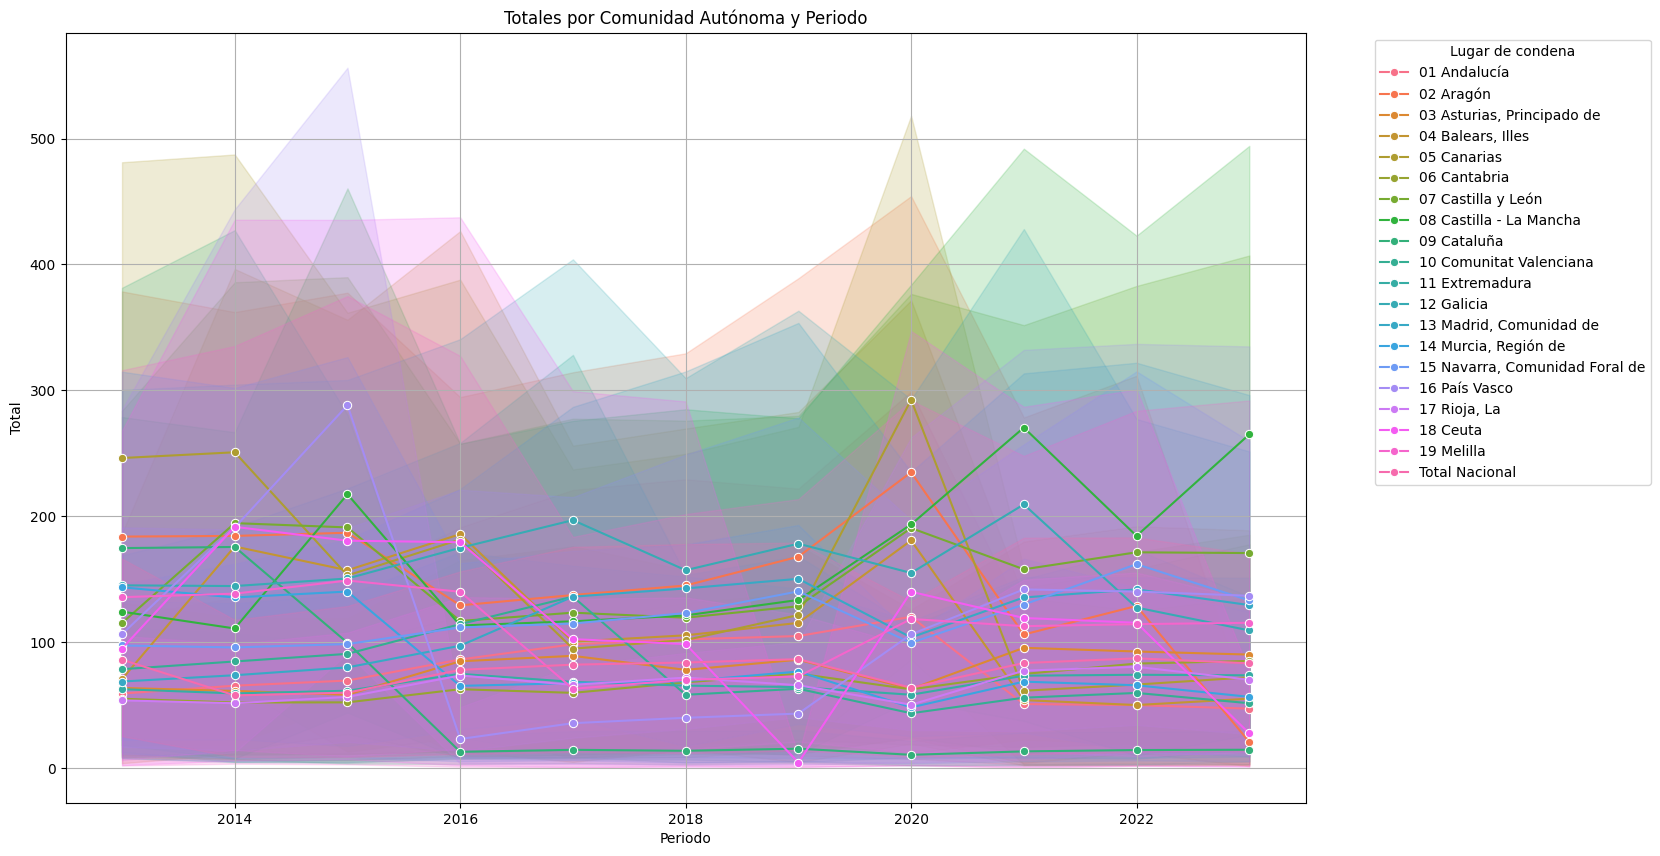

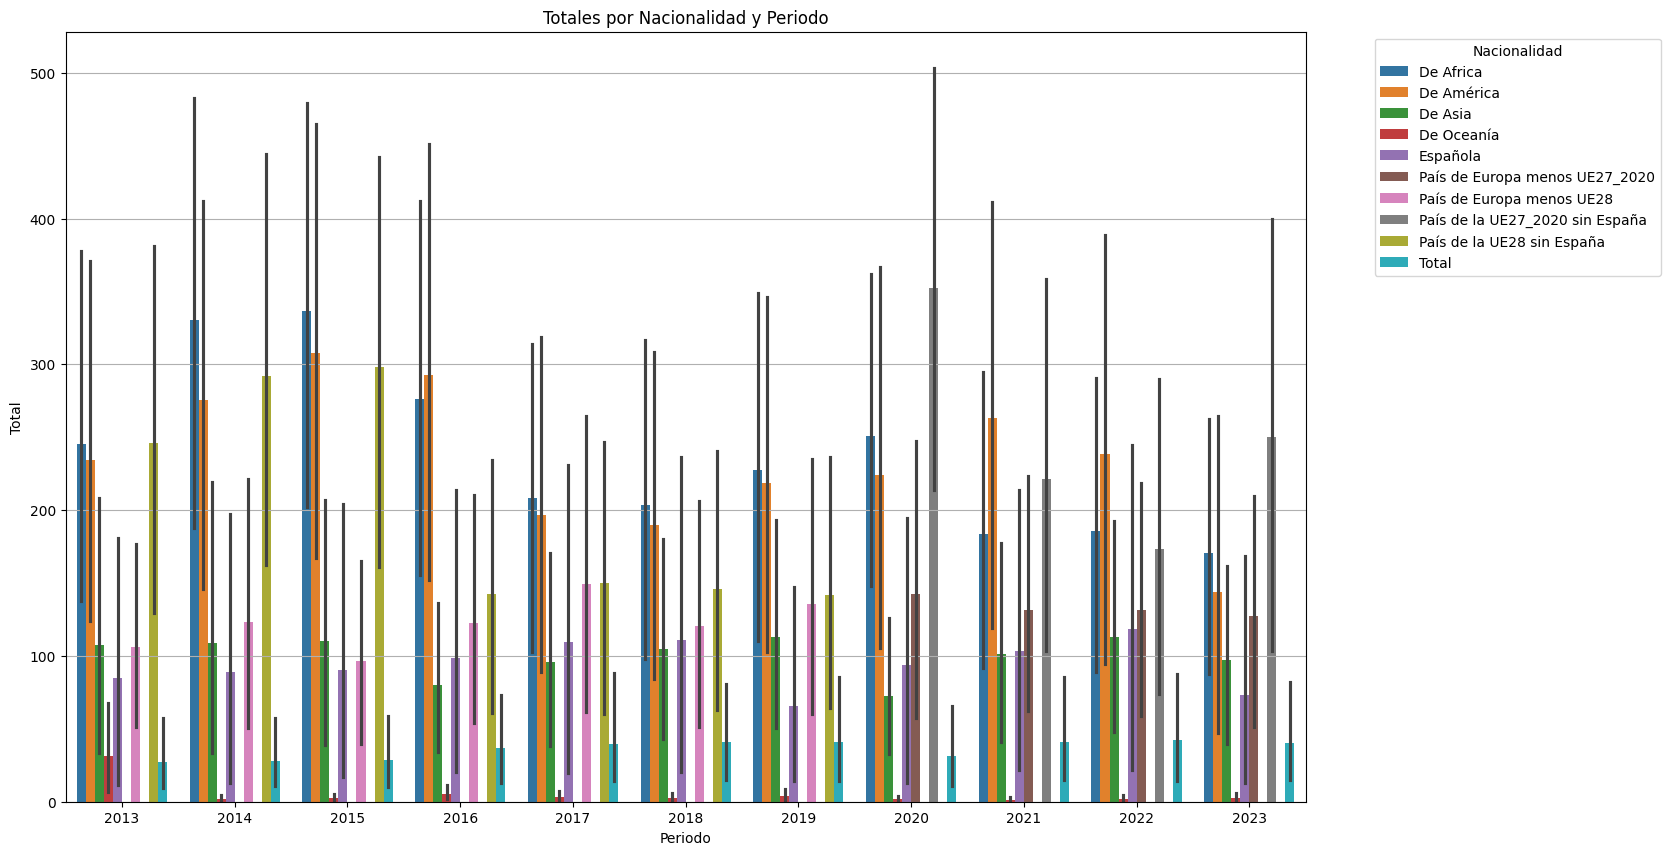

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

totales_por_comunidad = dfadultos.groupby(['Lugar de condena', 'Nacionalidad', 'Periodo'])['Total'].sum().reset_index()

plt.figure(figsize=(16, 10))

# Gráfico 1: Totales por comunidad autónoma y periodo
sns.lineplot(
    data=totales_por_comunidad,
    x='Periodo',
    y='Total',
    hue='Lugar de condena',
    marker='o'
)
plt.title('Totales por Comunidad Autónoma y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Lugar de condena')
plt.grid(True)
plt.show()

# Gráfico 2: Totales por nacionalidad y periodo
plt.figure(figsize=(16, 10))
sns.barplot(
    data=totales_por_comunidad,
    x='Periodo',
    y='Total',
    hue='Nacionalidad'
)
plt.title('Totales por Nacionalidad y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Nacionalidad')
plt.grid(axis='y')
plt.show()


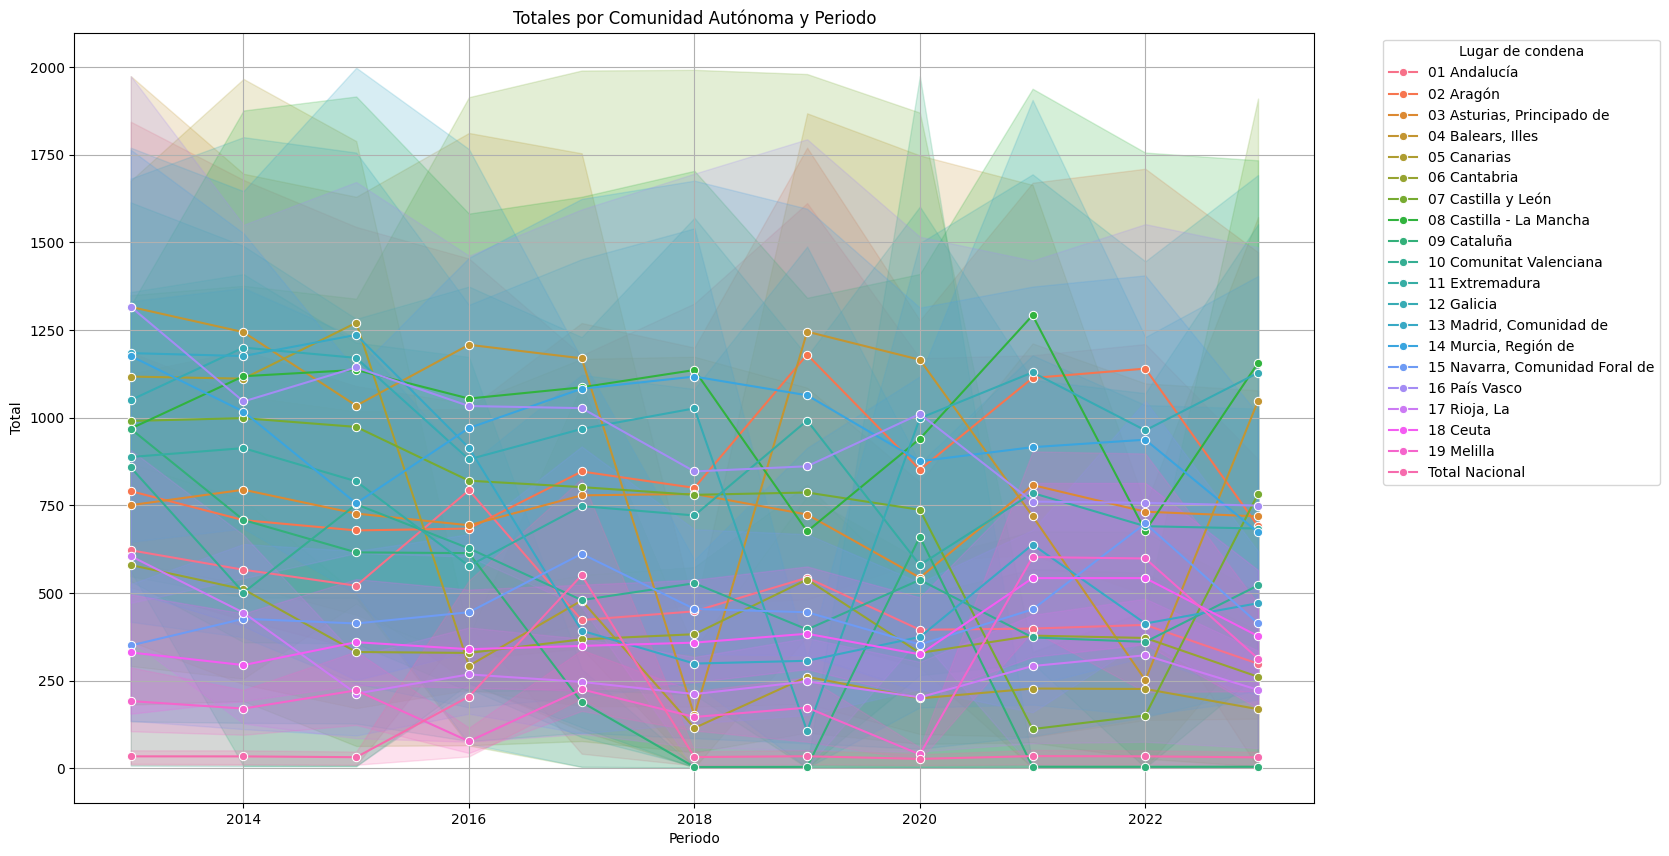

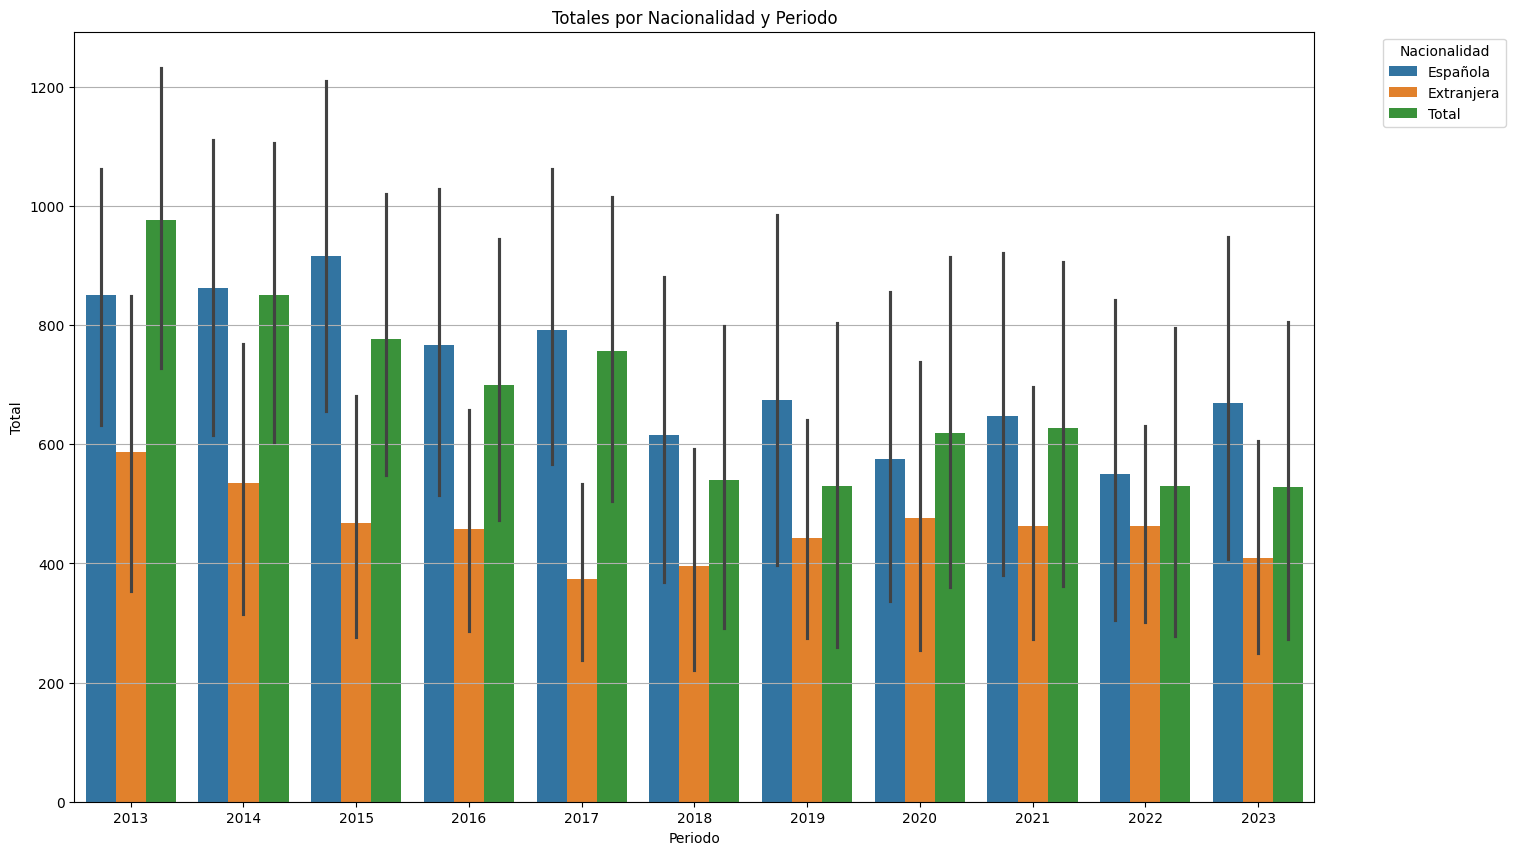

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

totales_por_comunidad = dfmenores.groupby(['Lugar de condena', 'Nacionalidad', 'Periodo'])['Total'].sum().reset_index()
plt.figure(figsize=(16, 10))

# Gráfico 1: Totales por comunidad autónoma y periodo
sns.lineplot(
    data=totales_por_comunidad,
    x='Periodo',
    y='Total',
    hue='Lugar de condena',
    marker='o'
)
plt.title('Totales por Comunidad Autónoma y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Lugar de condena')
plt.grid(True)
plt.show()

# Gráfico 2: Totales por nacionalidad y periodo
plt.figure(figsize=(16, 10))
sns.barplot(
    data=totales_por_comunidad,
    x='Periodo',
    y='Total',
    hue='Nacionalidad'
)
plt.title('Totales por Nacionalidad y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Nacionalidad')
plt.grid(axis='y')
plt.show()

Evidentemente no podemos hacer un análisis con tanta cantidad ingente de datos, para ello vamos hacer una comparativa de Madrid y Barcelona en el dataframe de adultos y menores

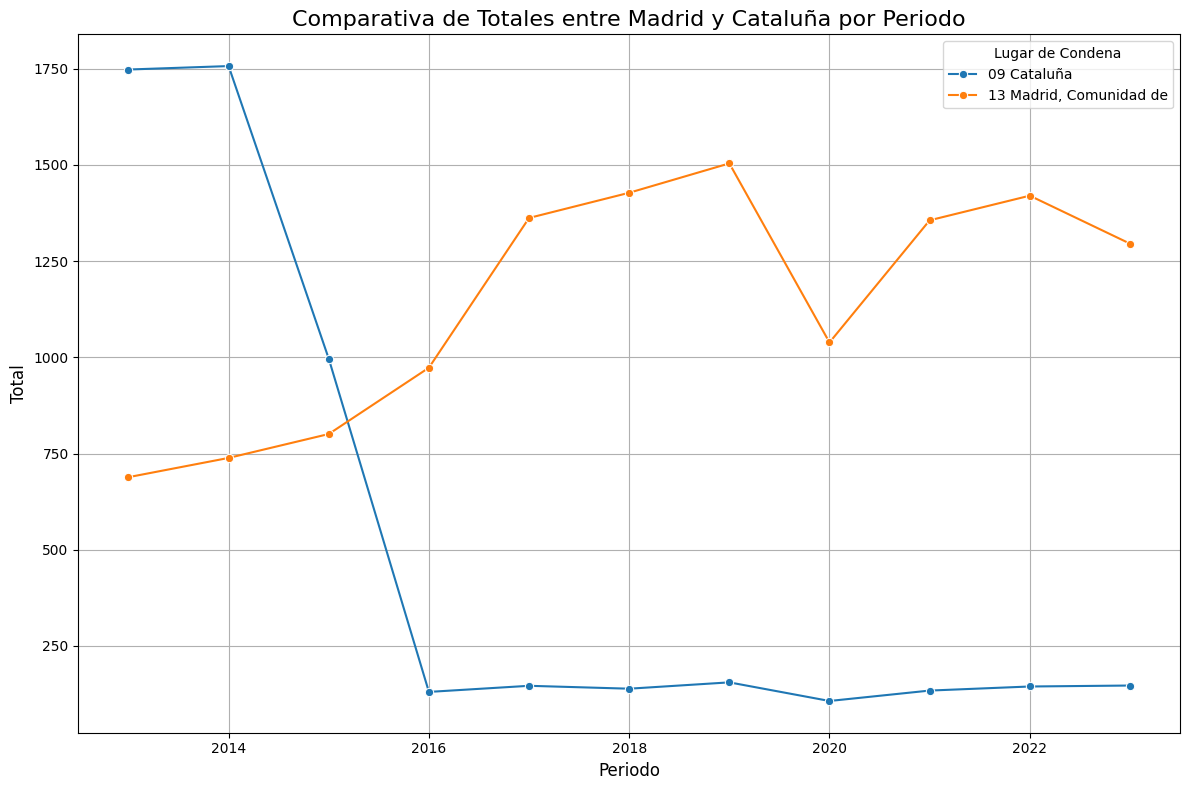

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_madrid_barcelona = dfadultos[dfadultos['Lugar de condena'].isin(['13 Madrid, Comunidad de', '09 Cataluña'])]
totales_comparativa = df_madrid_barcelona.groupby(['Periodo', 'Lugar de condena'])['Total'].sum().reset_index()

plt.figure(figsize=(12, 8))

sns.lineplot(
    data=totales_comparativa,
    x='Periodo',
    y='Total',
    hue='Lugar de condena',
    marker='o',
    palette='tab10')

plt.title('Comparativa de Totales entre Madrid y Cataluña por Periodo', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend(title='Lugar de Condena', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


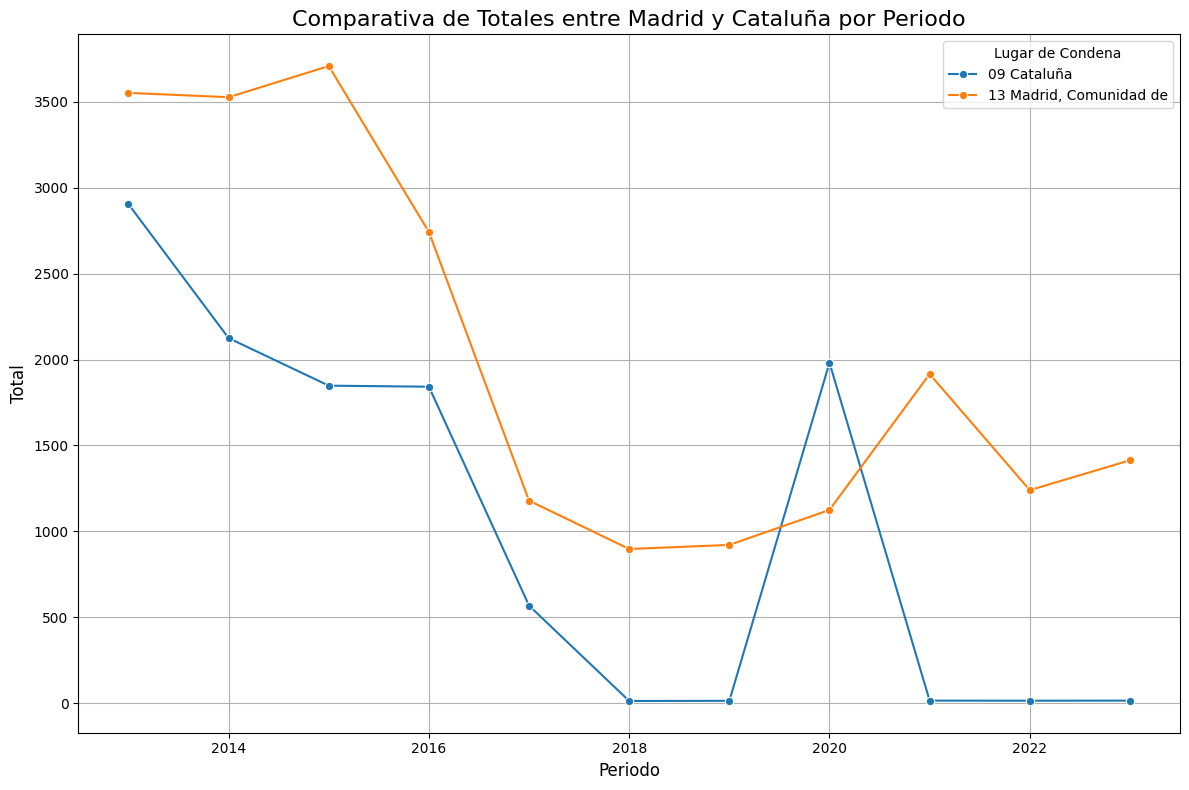

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_madrid_barcelona = dfmenores[dfmenores['Lugar de condena'].isin(['13 Madrid, Comunidad de', '09 Cataluña'])]
totales_comparativa = df_madrid_barcelona.groupby(['Periodo', 'Lugar de condena'])['Total'].sum().reset_index()

plt.figure(figsize=(12, 8))

sns.lineplot(
    data=totales_comparativa,
    x='Periodo',
    y='Total',
    hue='Lugar de condena',
    marker='o',
    palette='tab10')

plt.title('Comparativa de Totales entre Madrid y Cataluña por Periodo', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend(title='Lugar de Condena', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Lo primero que podemos deslucir es que tenemos datos faltantes, igualmente vamos a juntar ambos grafícos para sacar conclusiones.

<ipython-input-86-b242c84ccf64>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adultos_mb['Grupo'] = 'Adultos'
<ipython-input-86-b242c84ccf64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menores_mb['Grupo'] = 'Menores'


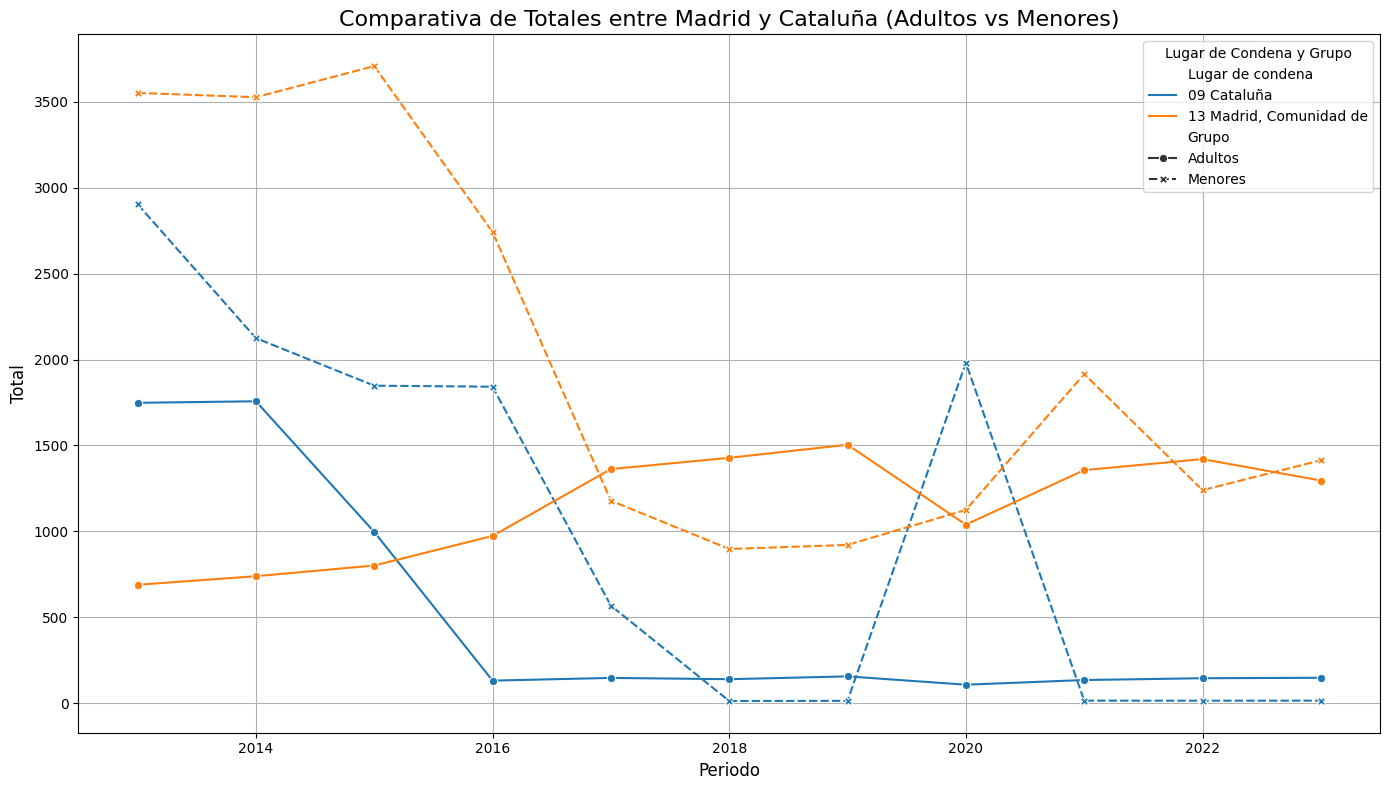

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

adultos_mb = dfadultos[dfadultos['Lugar de condena'].isin(['13 Madrid, Comunidad de', '09 Cataluña'])]
menores_mb = dfmenores[dfmenores['Lugar de condena'].isin(['13 Madrid, Comunidad de', '09 Cataluña'])]
adultos_mb['Grupo'] = 'Adultos'
menores_mb['Grupo'] = 'Menores'

df_combinado = pd.concat([adultos_mb, menores_mb])
totales_combinados = df_combinado.groupby(['Periodo', 'Lugar de condena', 'Grupo'])['Total'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=totales_combinados,
    x='Periodo',
    y='Total',
    hue='Lugar de condena',
    style='Grupo',
    markers=True,
    palette='tab10')

plt.title('Comparativa de Totales entre Madrid y Cataluña (Adultos vs Menores)', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend(title='Lugar de Condena y Grupo', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusiones.

El gráfico muestra cómo han cambiado las condenas de adultos y menores en Madrid y Cataluña a lo largo del tiempo. En Cataluña, tanto para adultos como para menores, las cifras van cayendo de forma clara desde 2014, hasta casi desaparecer en 2020 (o más probable datos faltantes), y luego se mantienen muy bajas. Por otro lado, en Madrid la tendencia es opuesta: las condenas, especialmente de adultos, aumentan progresivamente desde 2014 hasta 2022, aunque las de menores también suben pero de forma más irregular. Esto deja claro que mientras Cataluña ha visto una gran disminución, Madrid parece tener un crecimiento constante en las cifras. Las diferencias pueden deberse a políticas, cambios en la población o en el sistema judicial de cada región.

Realizamos otro ejemplo de Burgos para ver si también tenemos datos faltantes.

<ipython-input-88-e210d93f9d97>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burgos_adultos['Grupo'] = 'Adultos'
<ipython-input-88-e210d93f9d97>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burgos_menores['Grupo'] = 'Menores'


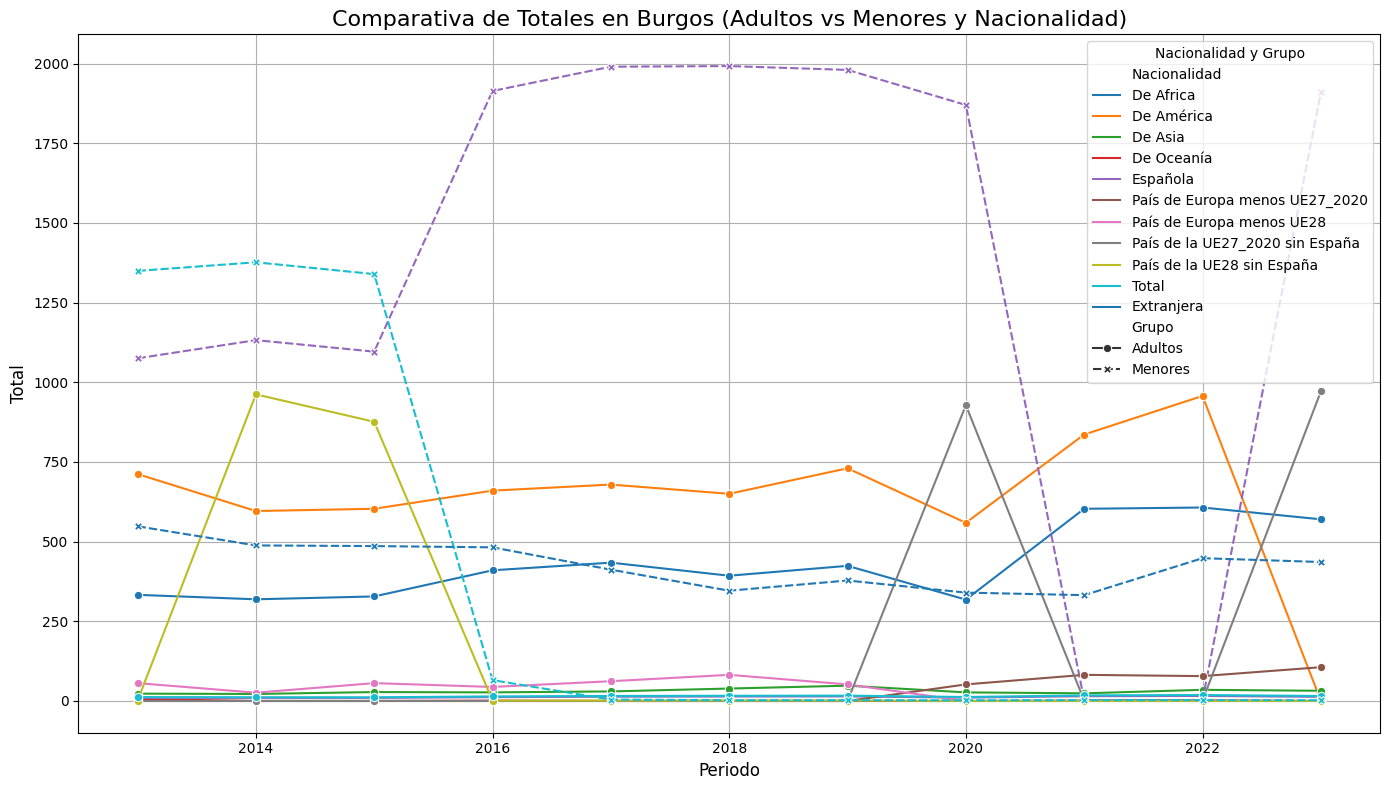

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

burgos_adultos = dfadultos[dfadultos['Lugar de condena'] == '07 Castilla y León']
burgos_menores = dfmenores[dfmenores['Lugar de condena'] == '07 Castilla y León']

burgos_adultos['Grupo'] = 'Adultos'
burgos_menores['Grupo'] = 'Menores'

adultos_nacionalidad = burgos_adultos.groupby(['Periodo', 'Lugar de condena', 'Grupo', 'Nacionalidad'])['Total'].sum().reset_index()
df_burgos_combinado = pd.concat([adultos_nacionalidad, burgos_menores])

totales_burgos = df_burgos_combinado.groupby(['Periodo', 'Lugar de condena', 'Grupo', 'Nacionalidad'])['Total'].sum().reset_index()

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=totales_burgos,
    x='Periodo',
    y='Total',
    hue='Nacionalidad',
    style='Grupo',
    markers=True,
    palette='tab10')

plt.title('Comparativa de Totales en Burgos (Adultos vs Menores y Nacionalidad)', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend(title='Nacionalidad y Grupo', fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()


Conclusiones

La comparativa de totales en Burgos para adultos y menores según nacionalidad entre 2014 y 2022 observa fluctuaciones significativas en varios grupos. La categoría “Española” es la más constante, especialmente en adultos, aunque presenta una caída visible en menores alrededor de 2015-2016. Por otro lado, los datos de “País de la UE28 sin España” tienen valores cero en ciertos periodos, lo que sugiere que faltan datos en esos años. La población “De América” mantiene una tendencia estable, especialmente en adultos, mientras que los menores muestran ligeras variaciones. Los grupos como “De África” y “De Asia” también presentan tendencias bajas pero constantes, aunque “De África” tiende a destacar más en los menores. El grupo “Extranjera” también muestra estabilidad con leve aumento en adultos hacia 2022. La caída abrupta en algunos segmentos probablemente indica errores o ausencia de datos, lo que impacta el análisis general.

Hacemos otro gráfico final para determinar por nacionalidad podemos sacar conclusiones.



<ipython-input-90-c6bb34223eca>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


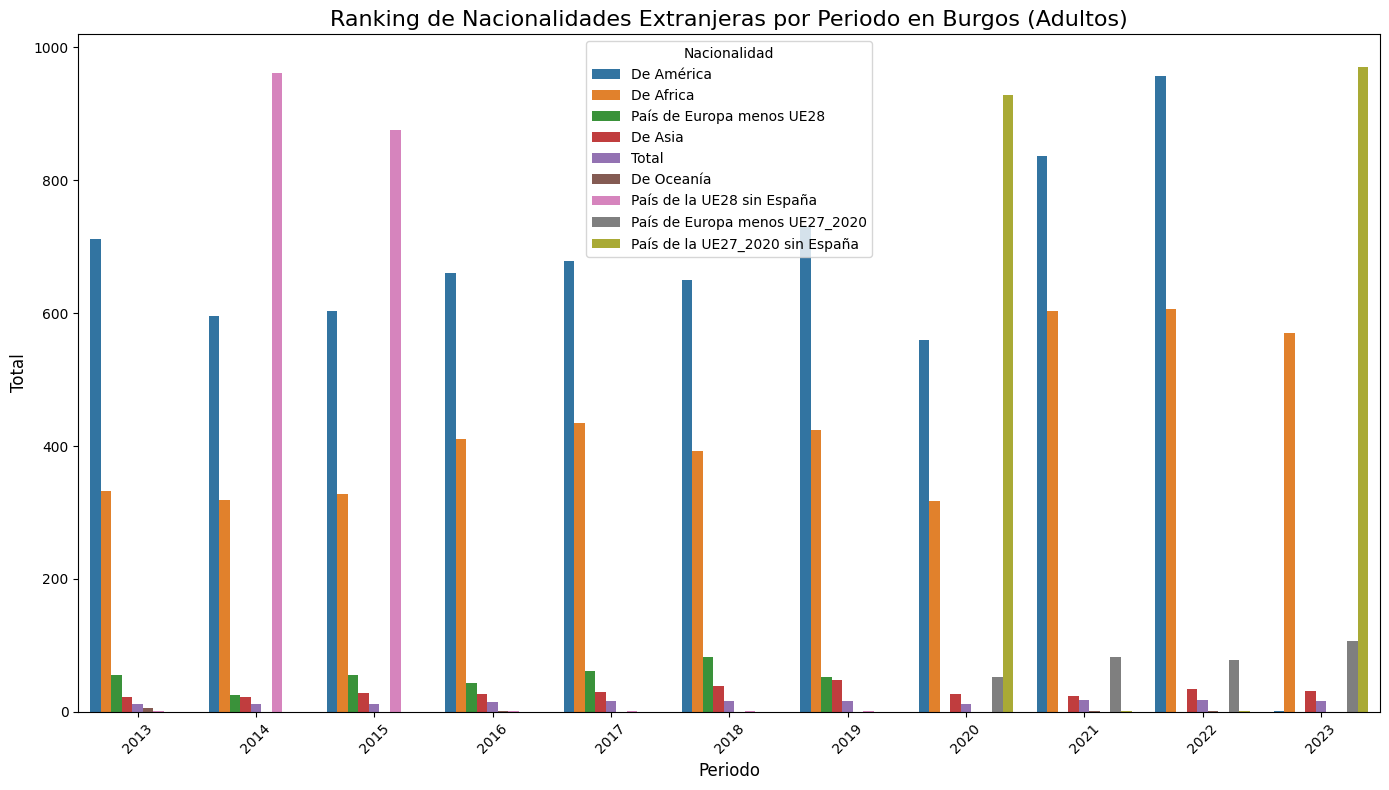

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

burgos_extranjeros = dfadultos[(dfadultos['Lugar de condena'] == '07 Castilla y León') &
                               (dfadultos['Nacionalidad'] != 'Española')]

ranking_burgos_extranjeros = burgos_extranjeros.groupby(['Periodo', 'Nacionalidad'])['Total'].sum().reset_index()

ranking_burgos_extranjeros = ranking_burgos_extranjeros.sort_values(by=['Periodo', 'Total'], ascending=[True, False])

plt.figure(figsize=(14, 8))

sns.barplot(
    data=ranking_burgos_extranjeros,
    x='Periodo',
    y='Total',
    hue='Nacionalidad',
    ci=None,
    palette='tab10' )

plt.title('Ranking de Nacionalidades Extranjeras por Periodo en Burgos (Adultos)', fontsize=16)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend(title='Nacionalidad', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La gráfica muestra que es evidente que los datos para "Total" son significativamente más altos, pero para algunas categorías hay periodos con valores en cero, lo que probablemente indica falta de datos más que ausencia de personas. Las nacionalidades de América y África presentan una tendencia estable con ligeros cambios, mientras que las categorías relacionadas con Europa (como países de la UE28 o UE27) tienen variaciones notables, especialmente después de 2020, coincidiendo con cambios políticos o administrativos. En 2020, los valores de la categoría "País de la UE27 sin España" destacan notablemente, tal vez reflejando ajustes en las clasificaciones tras el Brexit. En general, la gráfica apunta a que América y África mantienen presencia constante, mientras que otras categorías reflejan cambios ligados a factores externos o administrativos.